In [1800]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [1803]:
#read the loan data csv
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding and Cleaning

In [1806]:
# get the column names
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [1808]:
#get data shape
df.shape

(39717, 111)

In [1810]:
# get data description
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Cleaning columns with all Null Values

In [1813]:
#get the columns with null values greater than 0
#Calculate the number of null values per column
null_sum = df.isnull().sum()
#Identify columns with null values greater than 10,000
null_sum_filtered = null_sum[null_sum > 0]
print(null_sum_filtered)

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


In [1815]:
# Drop columns with all NA values
df = df.dropna(axis=1, how='all')

In [1817]:
#again check the columns with null values greater than 0
null_sum = df.isnull().sum()
null_sum_filtered = null_sum[null_sum > 0]
print(null_sum_filtered)

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64


## Cleaning columns with Null Values greater than 10000

In [1820]:
#drop the columns with null values greater than 10000
#Calculate the number of null values per column
null_counts = df.isnull().sum()

#Identify columns with null values greater than 10,000
columns_to_drop = null_counts[null_counts > 10000].index

#Drop these columns
df = df.drop(columns=columns_to_drop)

In [1822]:
#again check the columns with null values greater than 0
null_sum = df.isnull().sum()
null_sum_filtered = null_sum[null_sum > 0]
print(null_sum_filtered)

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64


In [1824]:
#get the number of null values
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

## Data handling in columns

### 'application_type' column

In [1828]:
#analyse 'application_type' values
df.application_type.value_counts()

application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [1830]:
##drop 'application type' column as it has only 'INDIVIDUAL' value
df = df.drop(columns=['application_type'])

### 'tax_liens' column

In [1833]:
#analyse 'tax_liens' values
df.tax_liens.value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

In [1835]:
df[np.isnan(df['tax_liens'])].shape

(39, 52)

In [1837]:
# 39678+39 = 39717 which is total number of rows. that means, either the value is 0.0 or null so we drop the column
df = df.drop(columns=['tax_liens'])

### 'chargeoff_within_12_mths' column

In [1840]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

In [1842]:
df[np.isnan(df['chargeoff_within_12_mths'])].shape

(56, 51)

In [1844]:
# 39661+56 = 39717 which is total number of rows. that means, either the value is 0.0 or null so we drop the column
df = df.drop(columns=['chargeoff_within_12_mths'])

### 'collections_12_mths_ex_med' column

In [1847]:
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [1849]:
df[np.isnan(df['collections_12_mths_ex_med'])].shape

(56, 50)

In [1851]:
# 39661+56 = 39717 which is total number of rows. that means, either the value is 0.0 or null so we drop the column
df = df.drop(columns=['collections_12_mths_ex_med'])

In [1853]:
#get the number of null values
df.isnull().sum()


id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_ac

### 'delinq_amnt' column, 'acc_now_delinq' column

In [1856]:
df.delinq_amnt.value_counts()

delinq_amnt
0    39717
Name: count, dtype: int64

In [1858]:

df.acc_now_delinq.value_counts()

acc_now_delinq
0    39717
Name: count, dtype: int64

In [1860]:
# all values are 0 so we drop the column
df = df.drop(columns=['delinq_amnt'])
df = df.drop(columns=['acc_now_delinq'])

### 'policy_code' column

In [1863]:
df.policy_code.value_counts()

policy_code
1    39717
Name: count, dtype: int64

In [1865]:
##drop 'policy_code ty' column as it has only '1' value
df = df.drop(columns=['policy_code'])

In [1867]:
#get the number of null values
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_ac

## Sanity Checks

### Exploring 'int-rate' column

In [1871]:
# manipulate and change the dtype of 'int_rate'
df["int_rate"].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [1873]:
df.int_rate = df.int_rate.str.replace("%","").astype('float64')

In [1875]:
df["int_rate"].value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

### The 'total amount committed to that loan' and 'total amount committed by investors for that loan' should be less than equal to 'loan amount requested'

In [1878]:
df[df.funded_amnt>df.loan_amnt]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [1880]:
df[df.funded_amnt_inv>df.loan_amnt]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


### removing the null value rows for 'emp_length' column as they are very less compared to the total number of rows

In [1883]:
df["emp_length"].isnull().sum()

1075

In [1885]:
df = df[~df["emp_length"].isnull()]

In [1887]:
df["emp_length"].isnull().sum()

0

### removing the null value rows for 'last_pymnt_d' column as they are very less compared to the total number of rows

In [1890]:
df["last_pymnt_d"].isnull().sum()

66

In [1892]:
df = df[~df["last_pymnt_d"].isnull()]

In [1894]:
df["last_pymnt_d"].isnull().sum()

0

### removing the null value rows for 'pub_rec_bankruptcies' column as they are very less compared to the total number of rows

In [1897]:
df["pub_rec_bankruptcies"].isnull().sum()

697

In [1899]:
df = df[~df["pub_rec_bankruptcies"].isnull()]

In [1901]:
df["pub_rec_bankruptcies"].isnull().sum()

0

## Filtering Data

### removing columns irrelevant to analysis

columns which are updated after loan approvals and will not make sense in analysis
1. total_pymnt
2. total_pymnt_inv
3. total_rec_prncp
4. total_rec_int
5. total_rec_late_fee
6. recoveries
7. collection_recovery_fee
8. last_pymnt_d
9. last_pymnt_amnt
10. last_credit_pull_d

In [1906]:
# remove columns - 'funded_amnt_inv', 'emp_title', 'pymnt_plan', 'url','title', 'zip_code', 
#'revol_bal', 'revol_util','initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
#'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'

In [1908]:
columnstodrop = ['funded_amnt_inv', 'emp_title', 'pymnt_plan', 'url','title', 'zip_code', 
'revol_bal', 'revol_util','initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
df = df.drop(columns=columnstodrop)

In [1910]:
df.shape

(37879, 25)

In [1912]:
# Check if there are any duplicates
has_duplicates = df.duplicated().any()
print(has_duplicates) # Output: False, means no duplicate records

False


### There are no duplicate records in the data

In [1915]:
df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

### check all data types and change if needed

In [1918]:
df.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [1920]:
#Converting to date datatype
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')

In [1922]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

### Create derived variable by Split data fields to year, month,weekday

In [1925]:
df['issued_year']= df.issue_d.dt.year.astype(object)
df['issued_month'] = df.issue_d.dt.strftime('%b')

#second field 'earliest_cr_line' 
df['earliest_cr_year']= (df.earliest_cr_line.dt.year).astype(object)
df['earliest_cr_month']= df.earliest_cr_line.dt.strftime('%b')


In [1927]:
df = df.drop(columns=["issue_d","earliest_cr_line"])

In [1929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37879 entries, 0 to 39680
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37879 non-null  int64  
 1   member_id             37879 non-null  int64  
 2   loan_amnt             37879 non-null  int64  
 3   funded_amnt           37879 non-null  int64  
 4   term                  37879 non-null  object 
 5   int_rate              37879 non-null  float64
 6   installment           37879 non-null  float64
 7   grade                 37879 non-null  object 
 8   sub_grade             37879 non-null  object 
 9   emp_length            37879 non-null  object 
 10  home_ownership        37879 non-null  object 
 11  annual_inc            37879 non-null  float64
 12  verification_status   37879 non-null  object 
 13  loan_status           37879 non-null  object 
 14  purpose               37879 non-null  object 
 15  addr_state            37

In [1931]:
df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
issued_year             0
issued_month            0
earliest_cr_year        0
earliest_cr_month       0
dtype: int64

In [1933]:
num_cols = ['loan_amnt', 'int_rate','installment','annual_inc','dti','open_acc','total_acc']
cat_cols = ['term','grade','sub_grade', 'emp_length','home_ownership','verification_status', 'loan_status','purpose',
            'addr_state', 'delinq_2yrs','inq_last_6mths',
            'pub_rec','pub_rec_bankruptcies','issued_year','issued_month','earliest_cr_year','earliest_cr_month']
extra_cols = ['id', 'member_id', 'funded_amnt']
len(num_cols)+len(cat_cols)+len(extra_cols)

27

In [1935]:
df.shape

(37879, 27)

## Univariate Analysis

#### Categorical

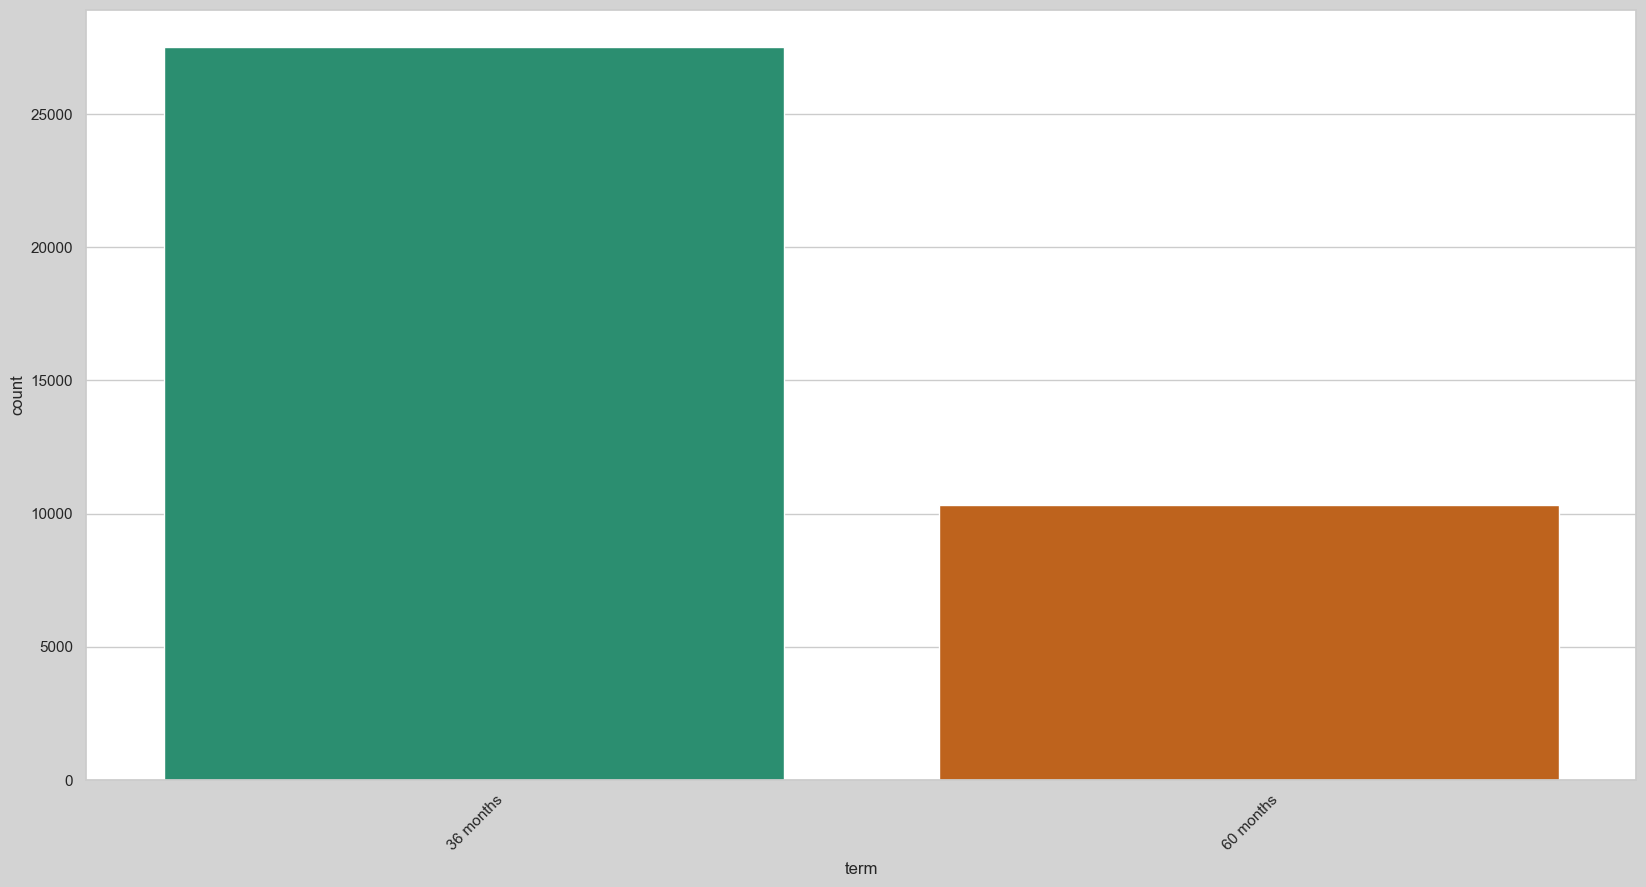

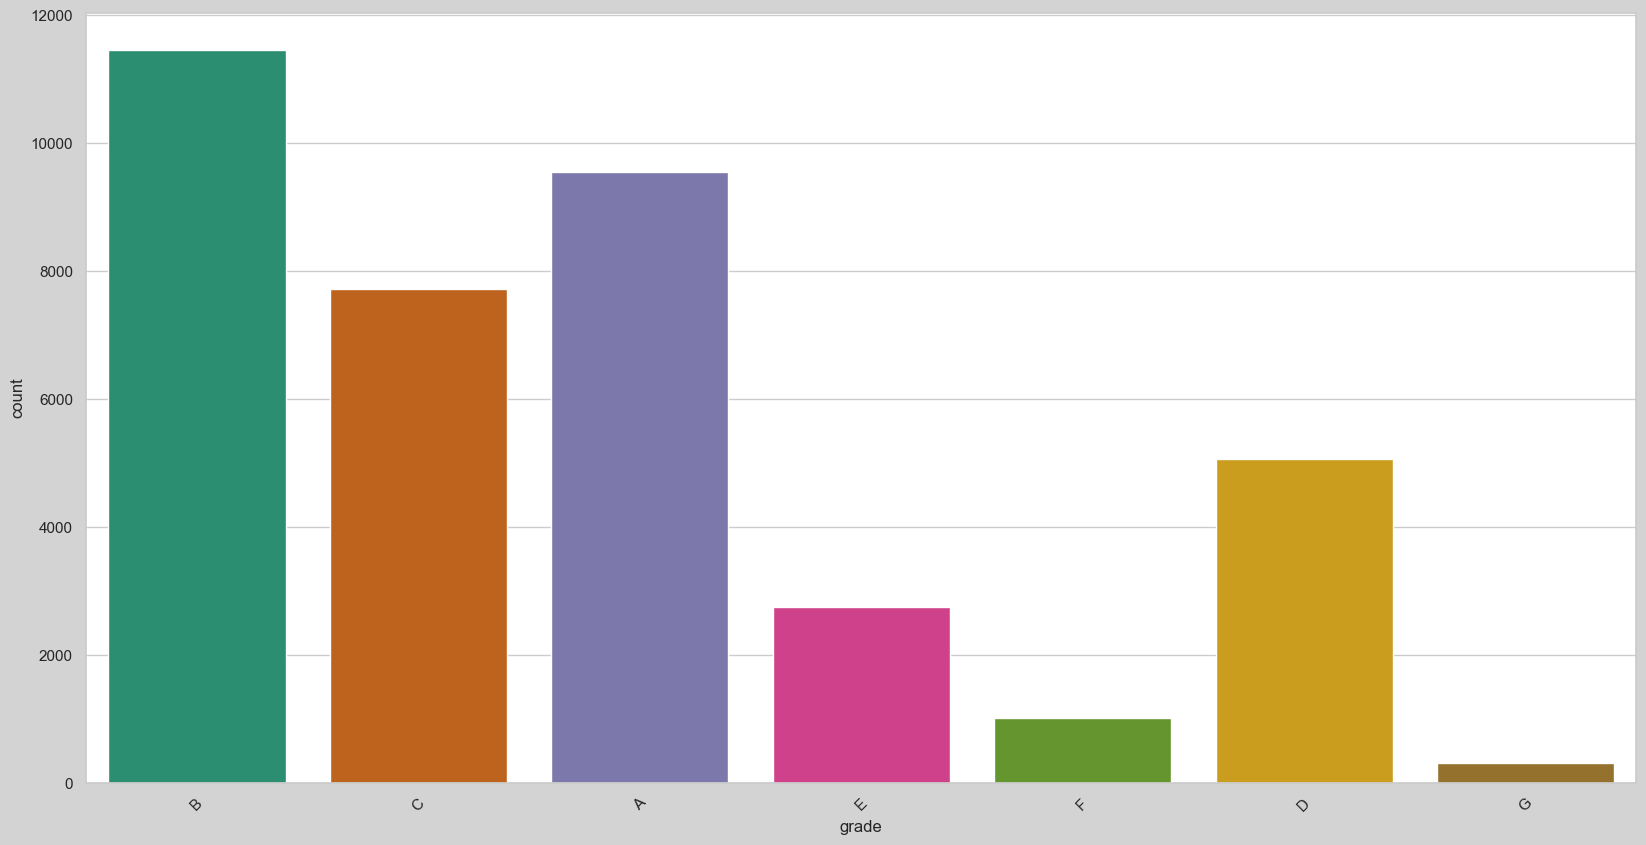

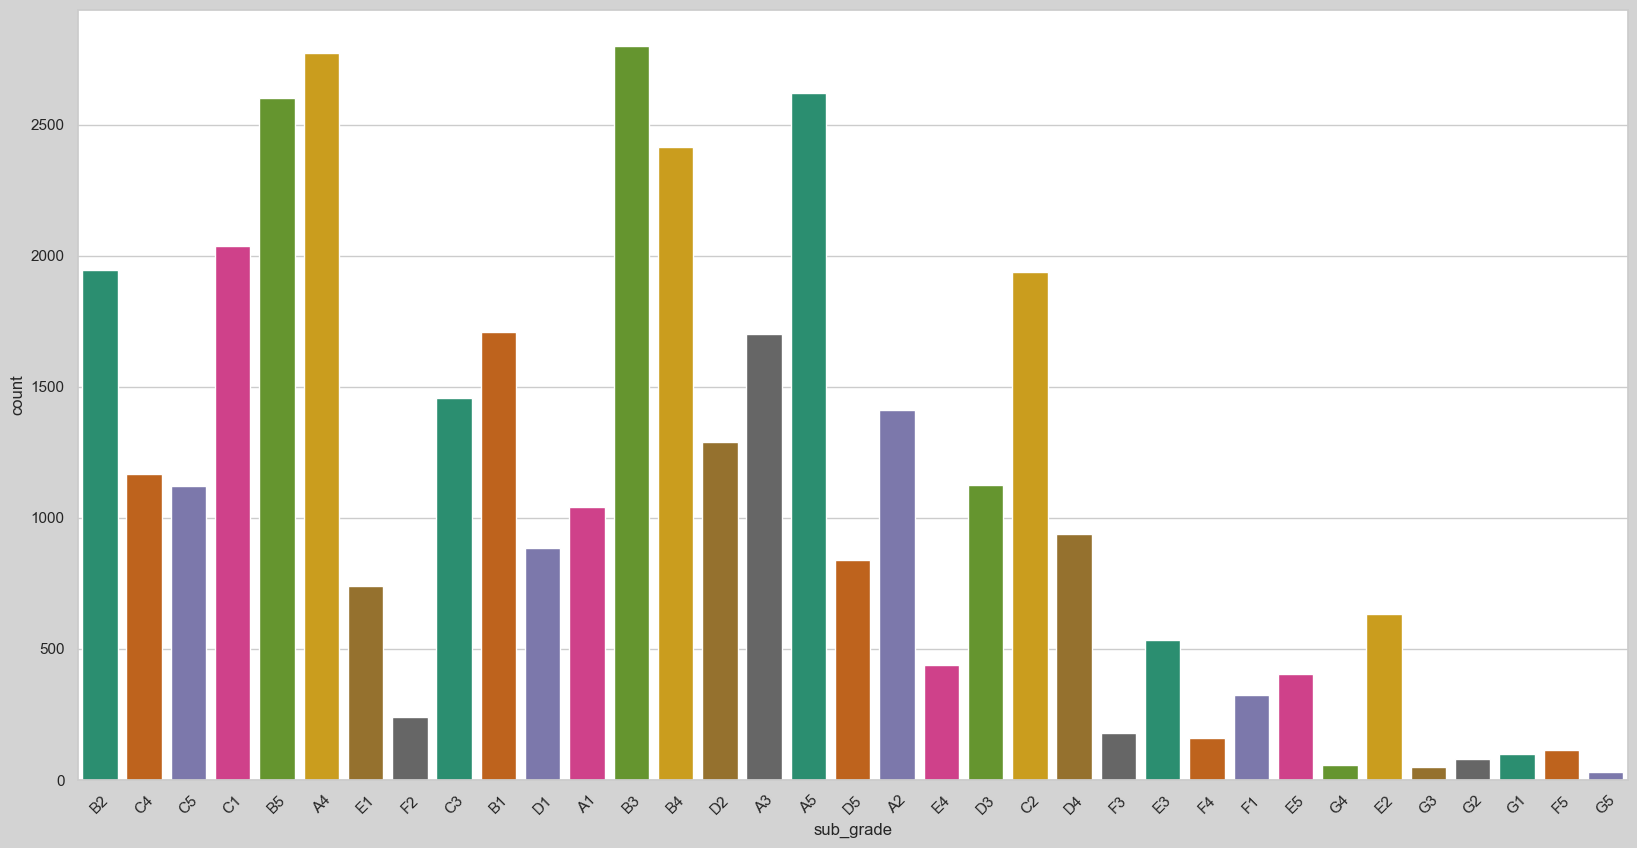

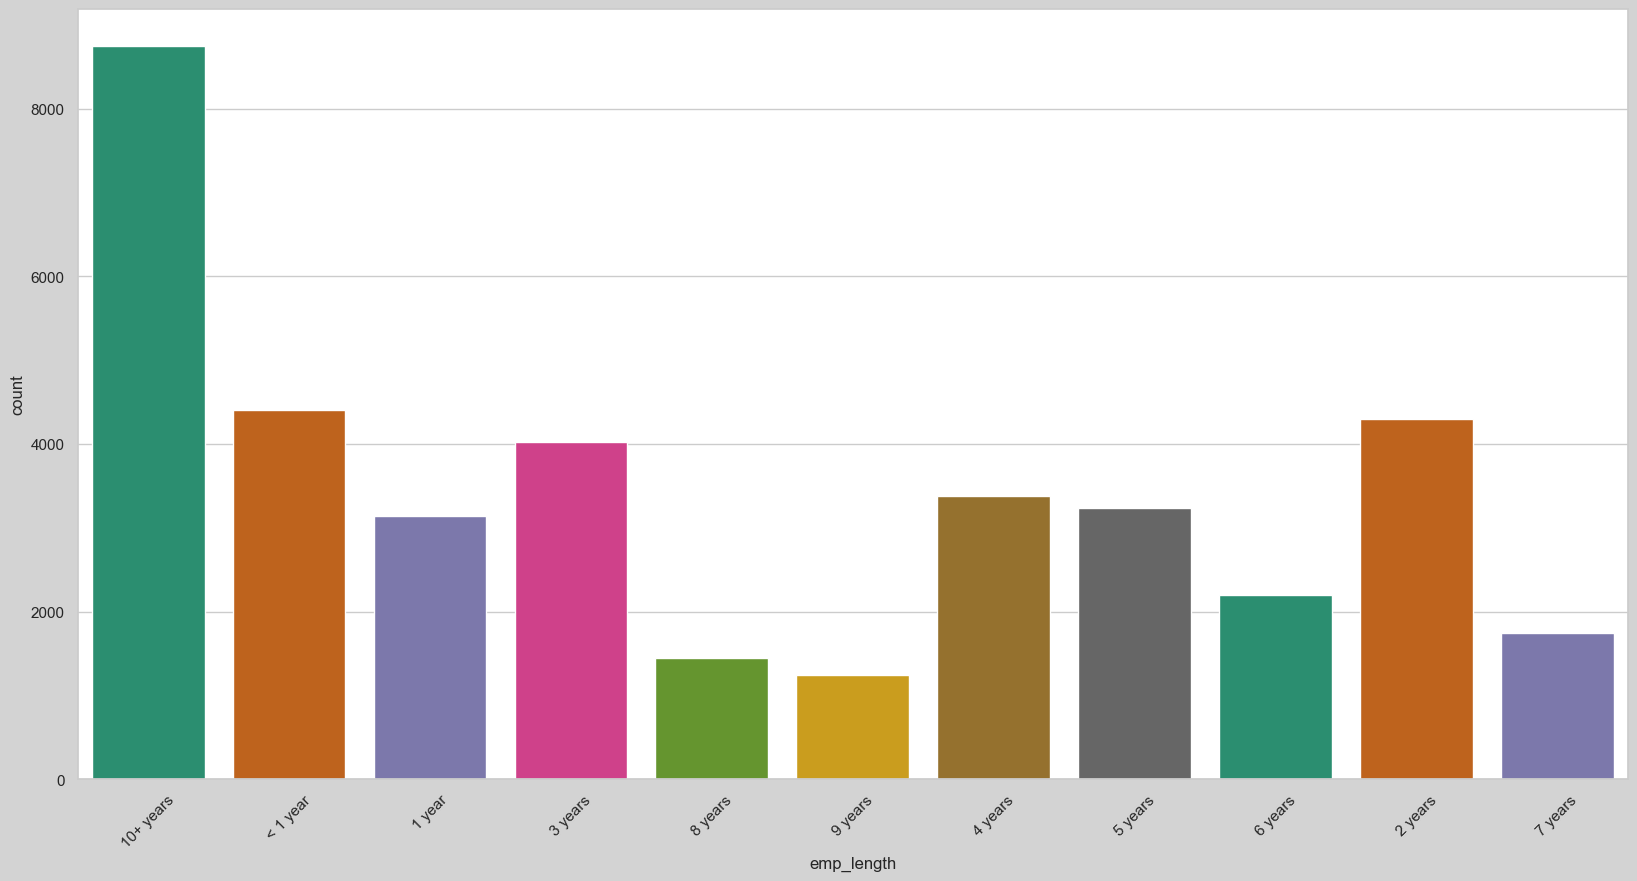

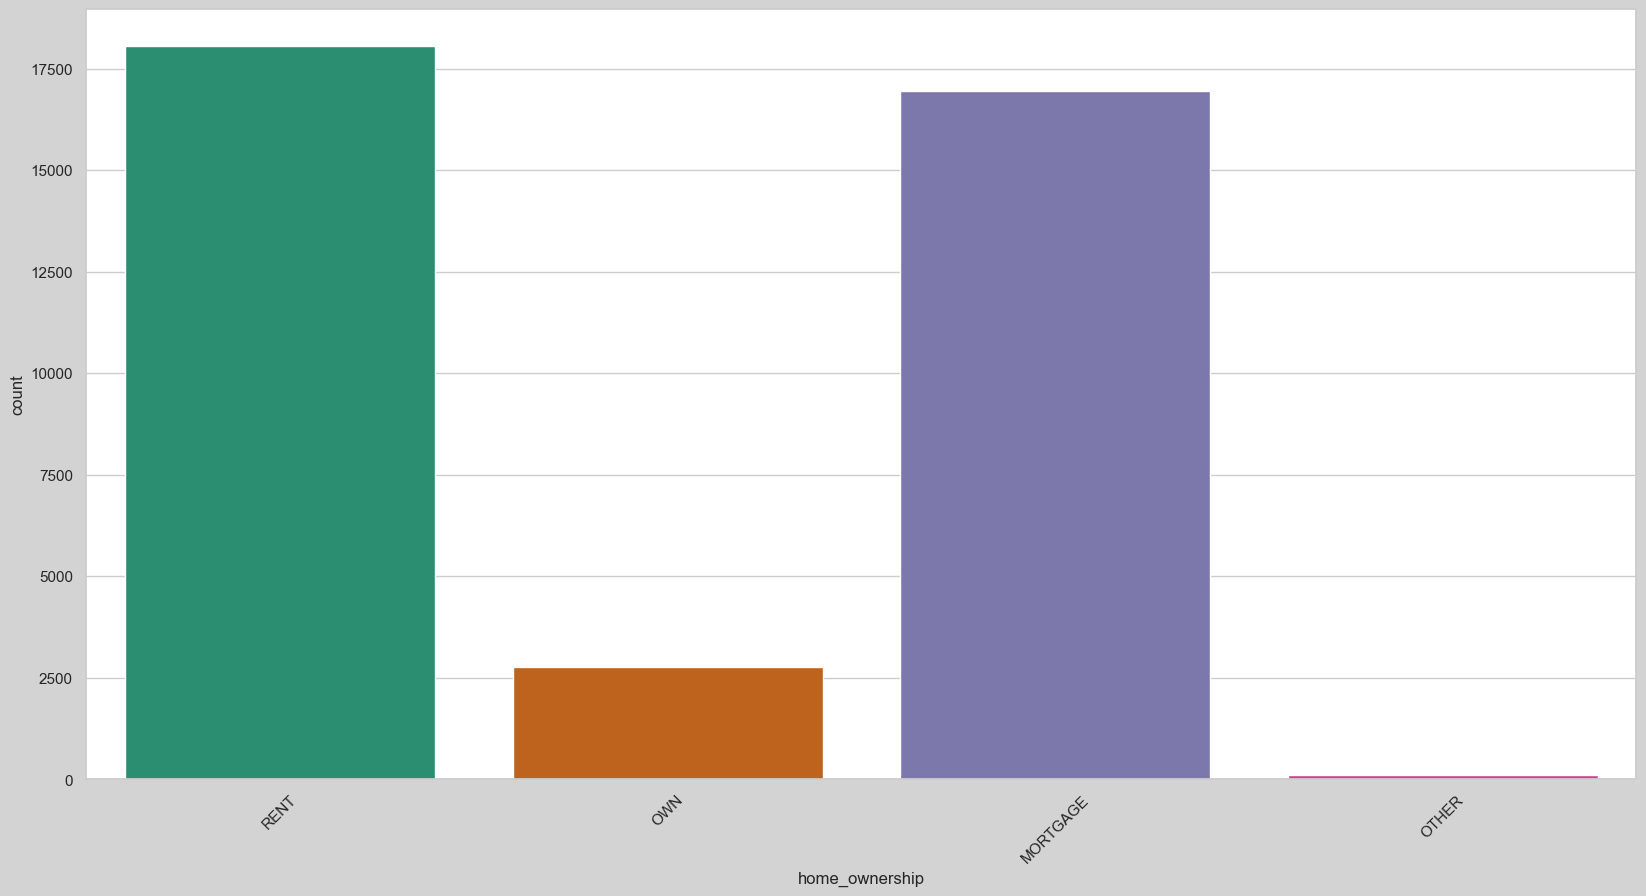

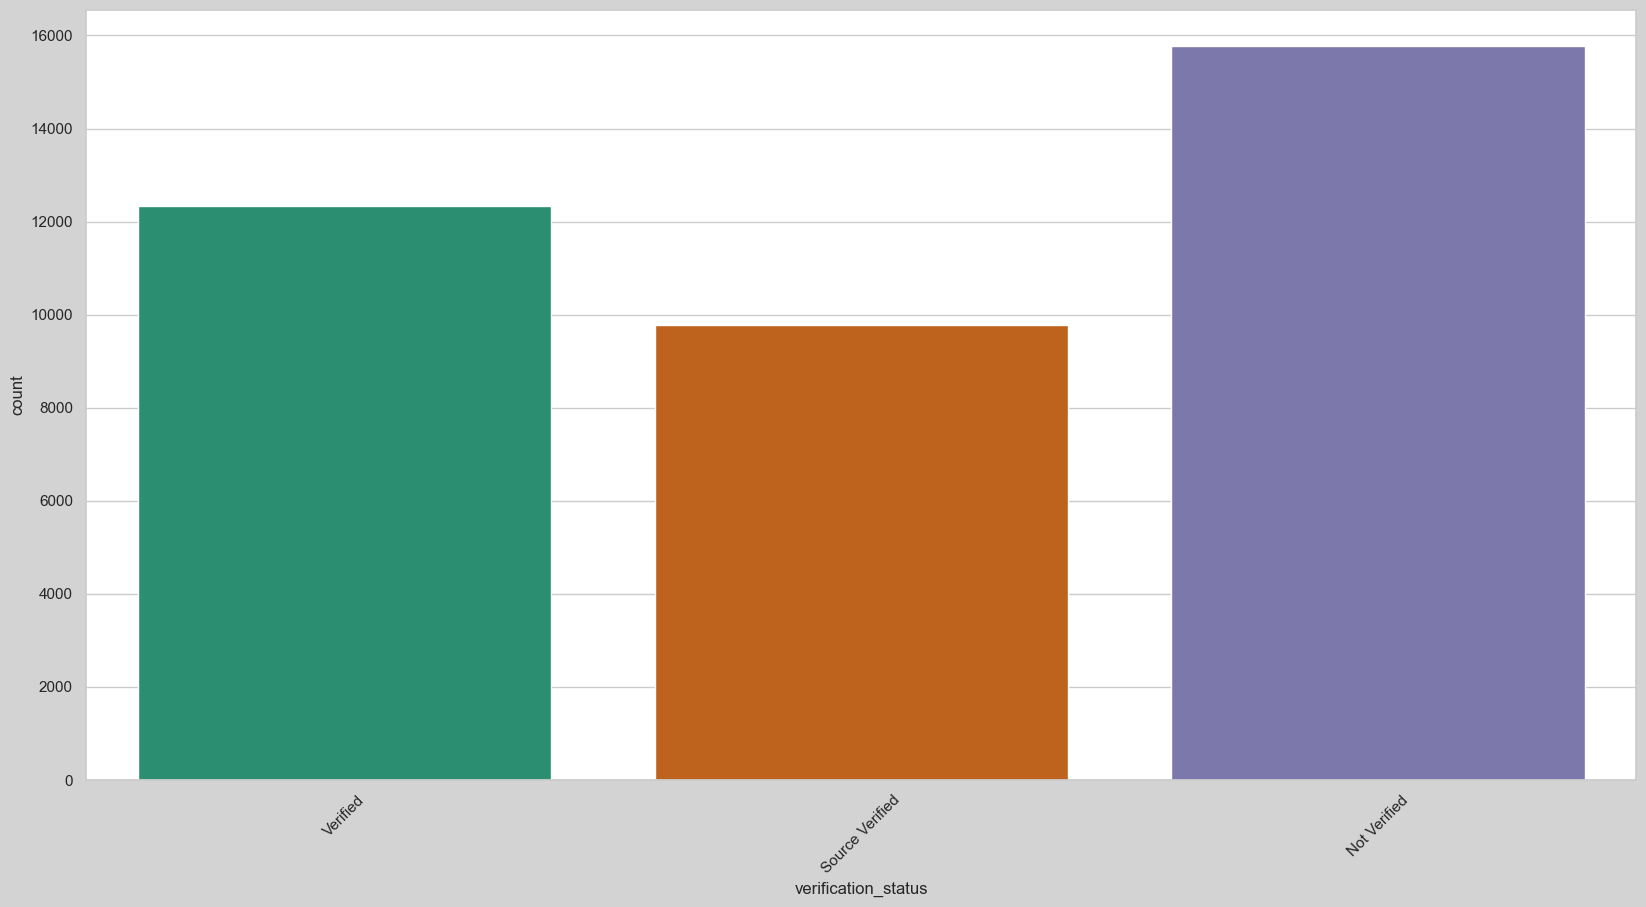

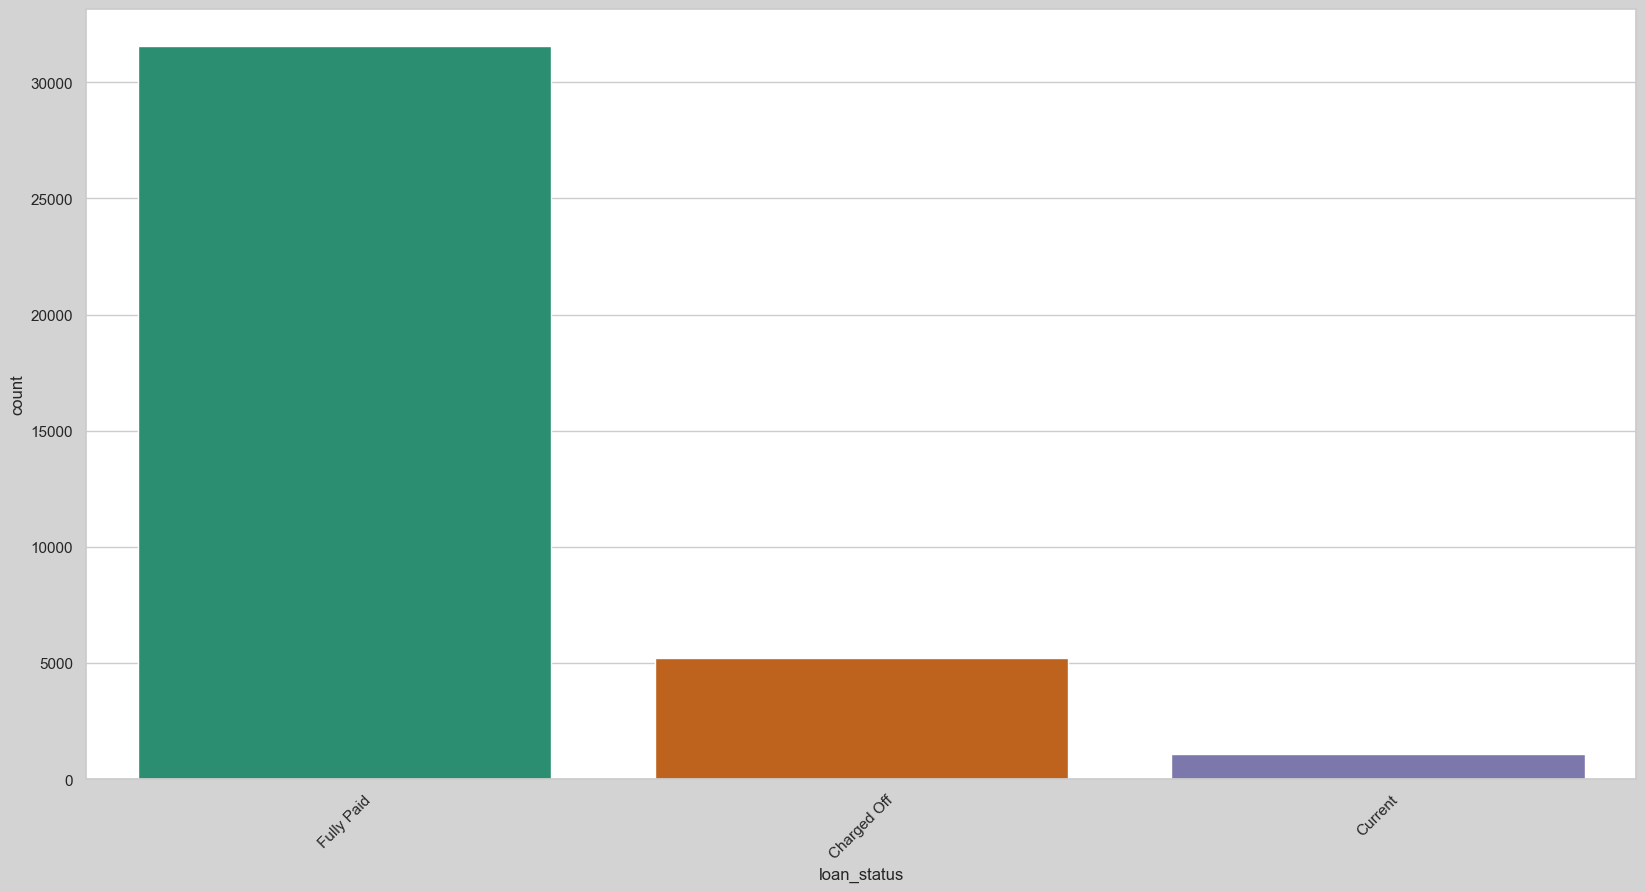

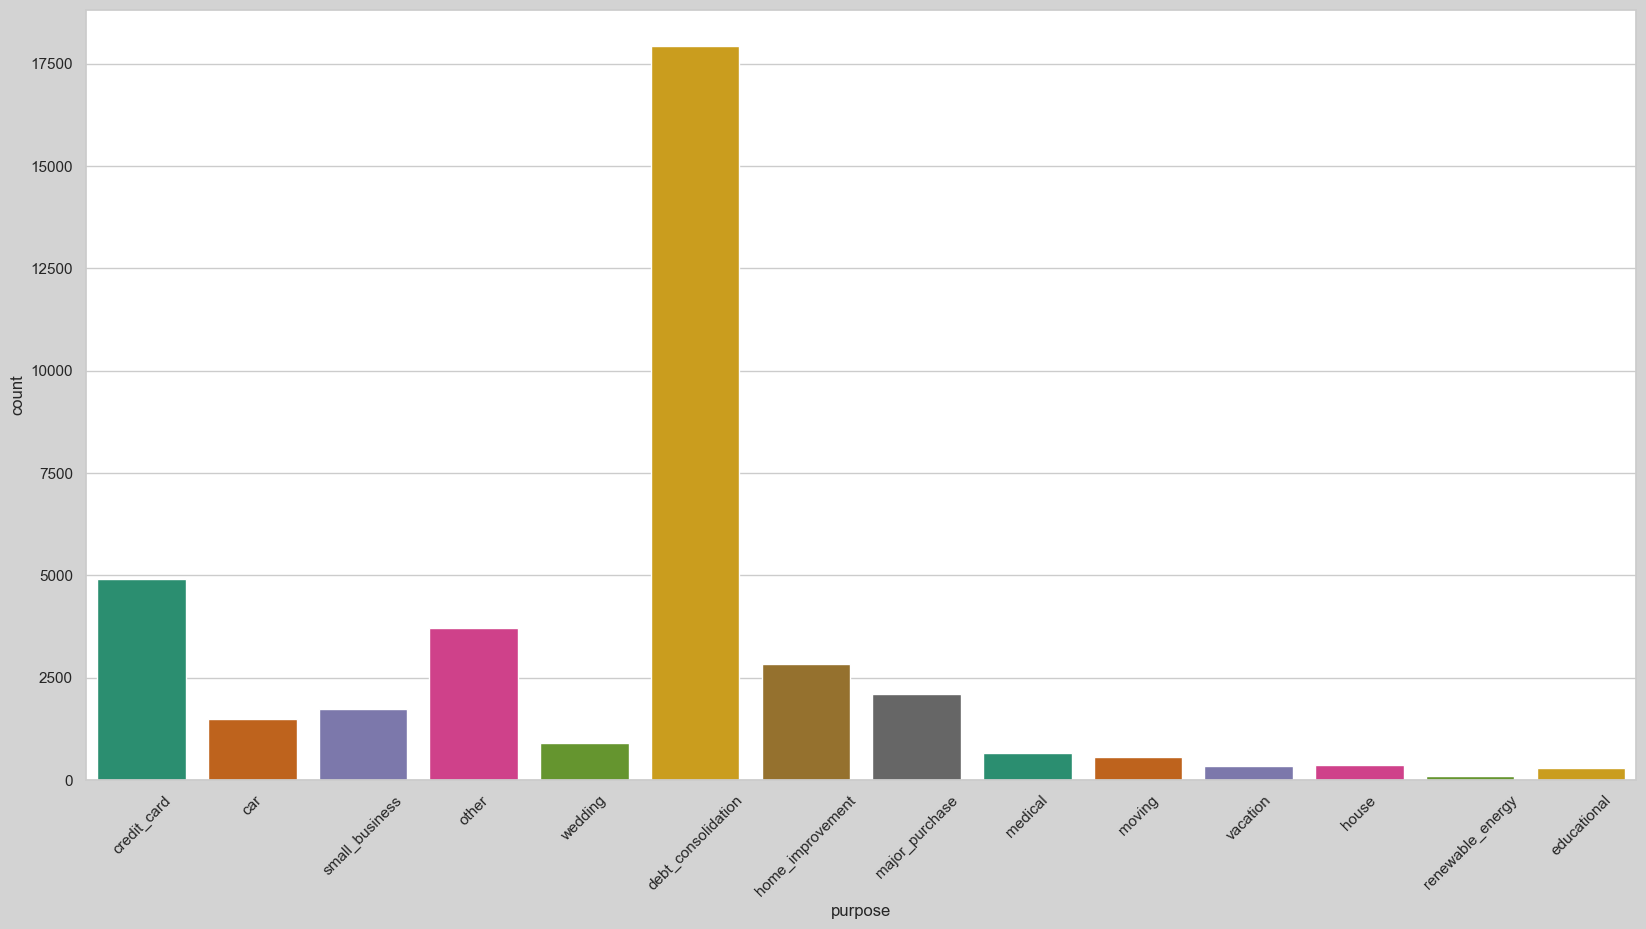

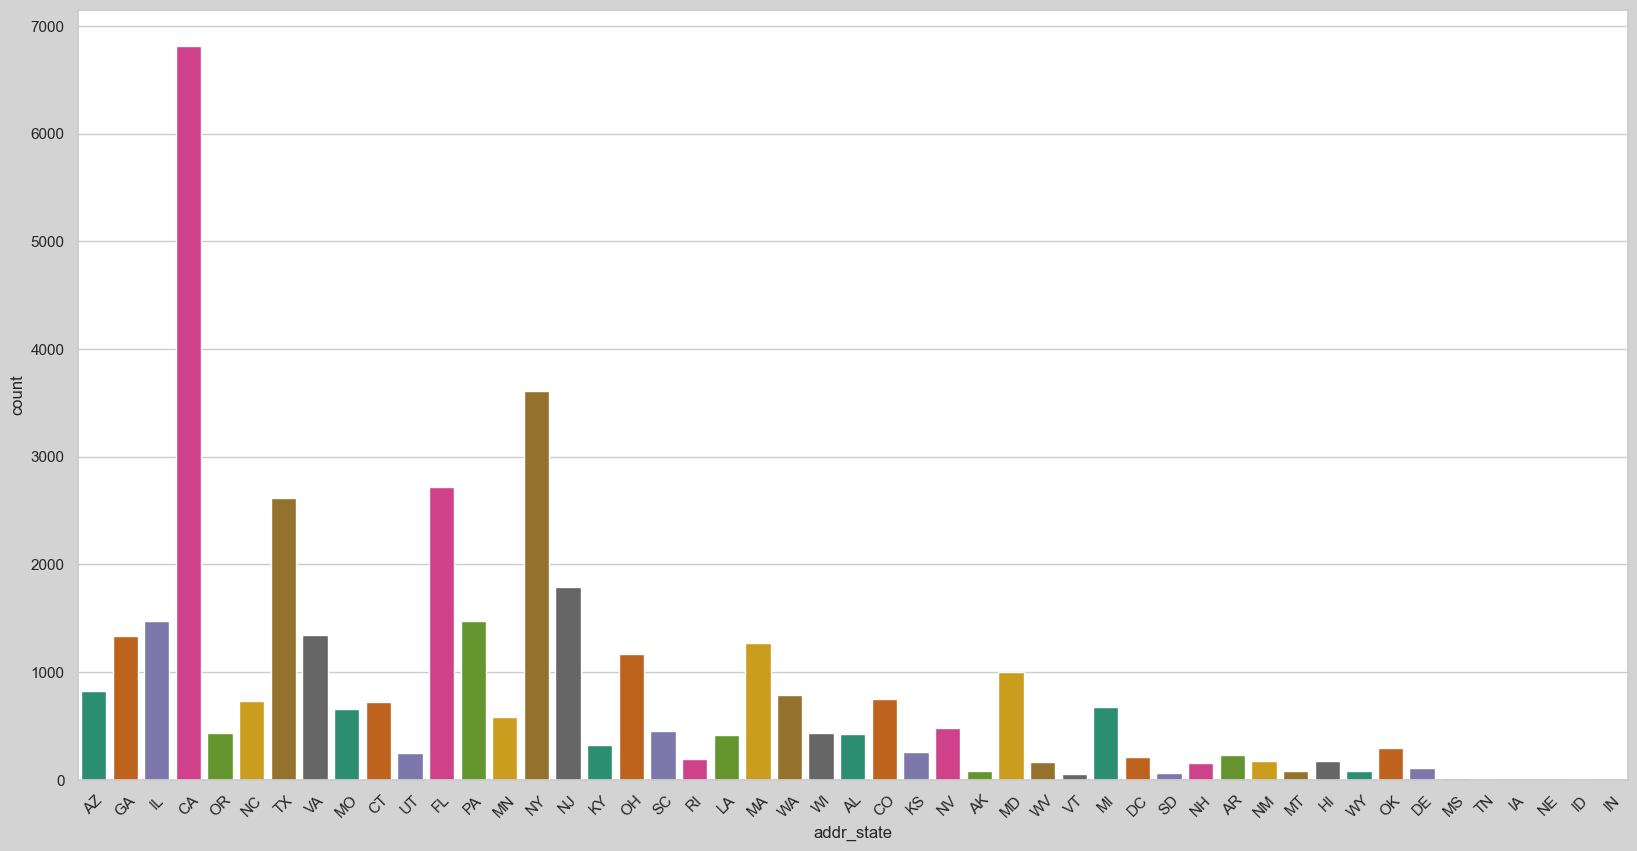

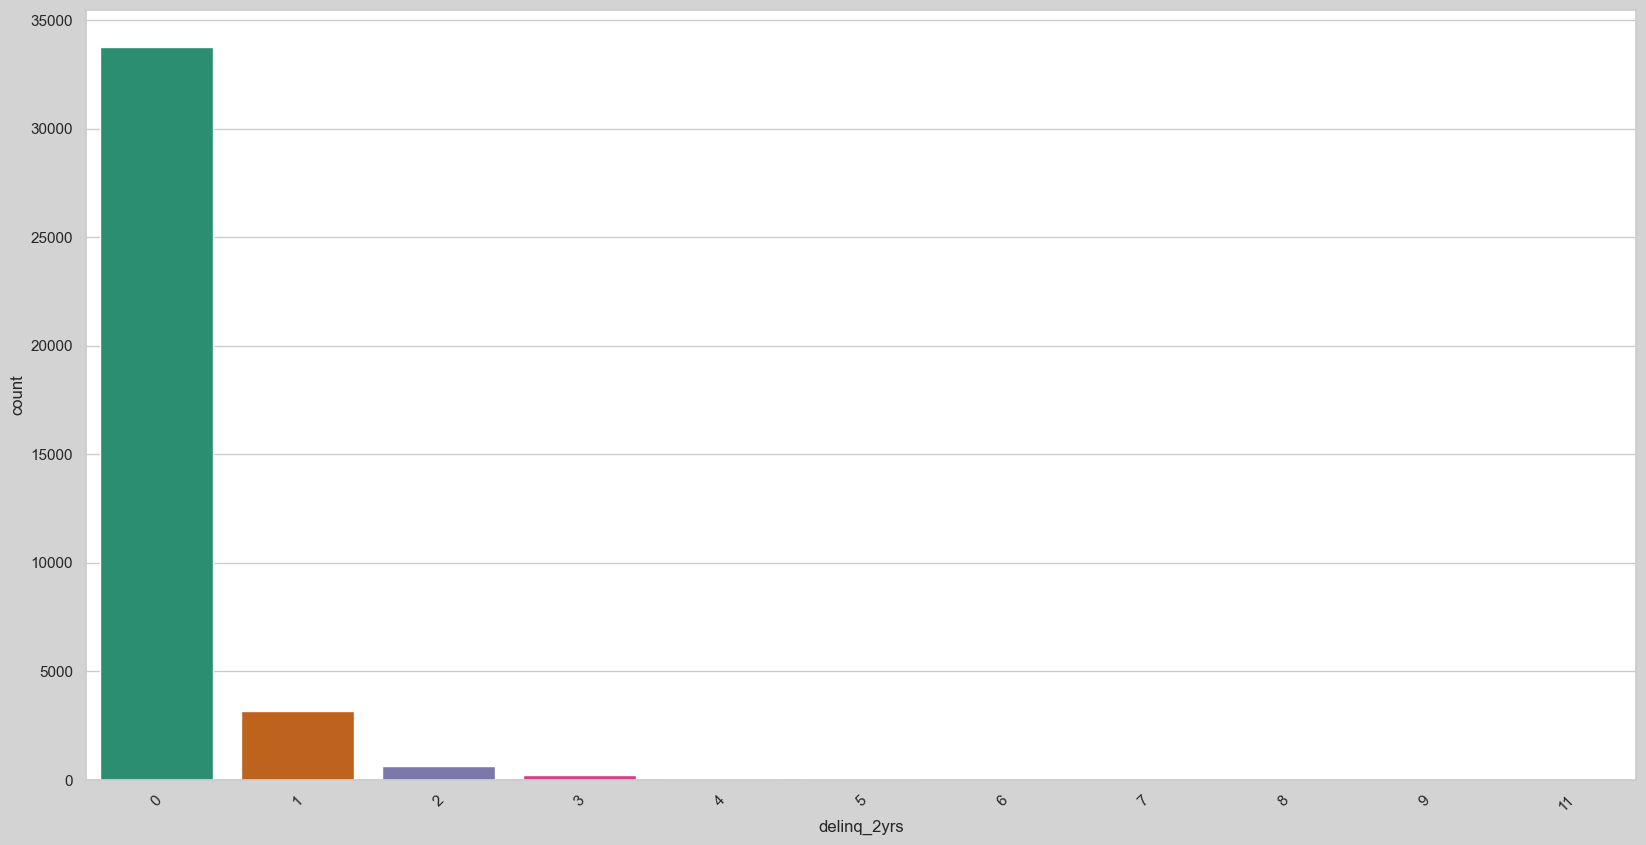

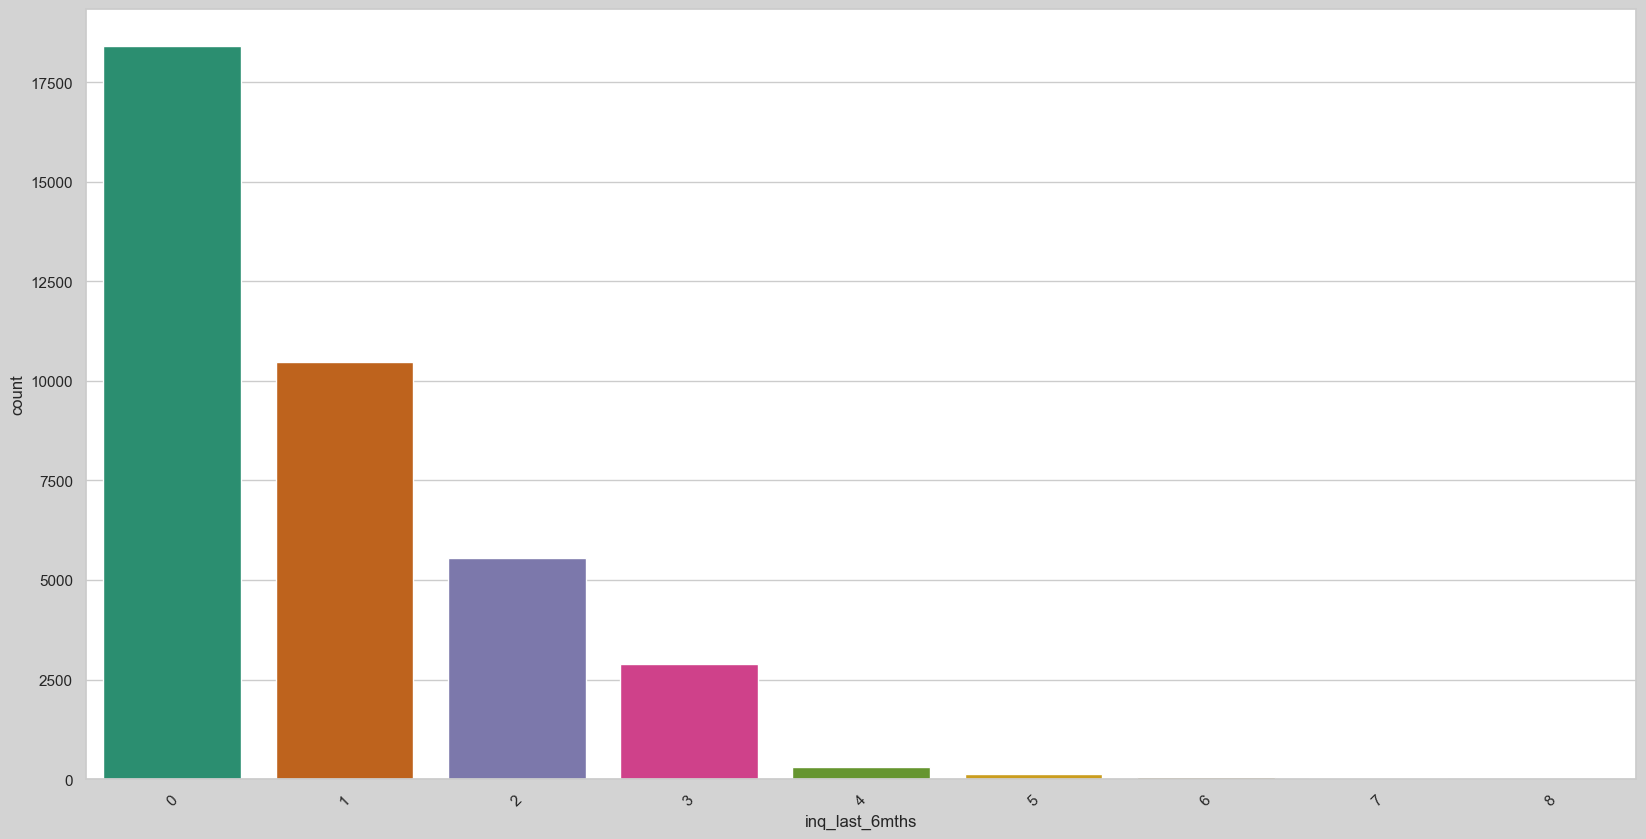

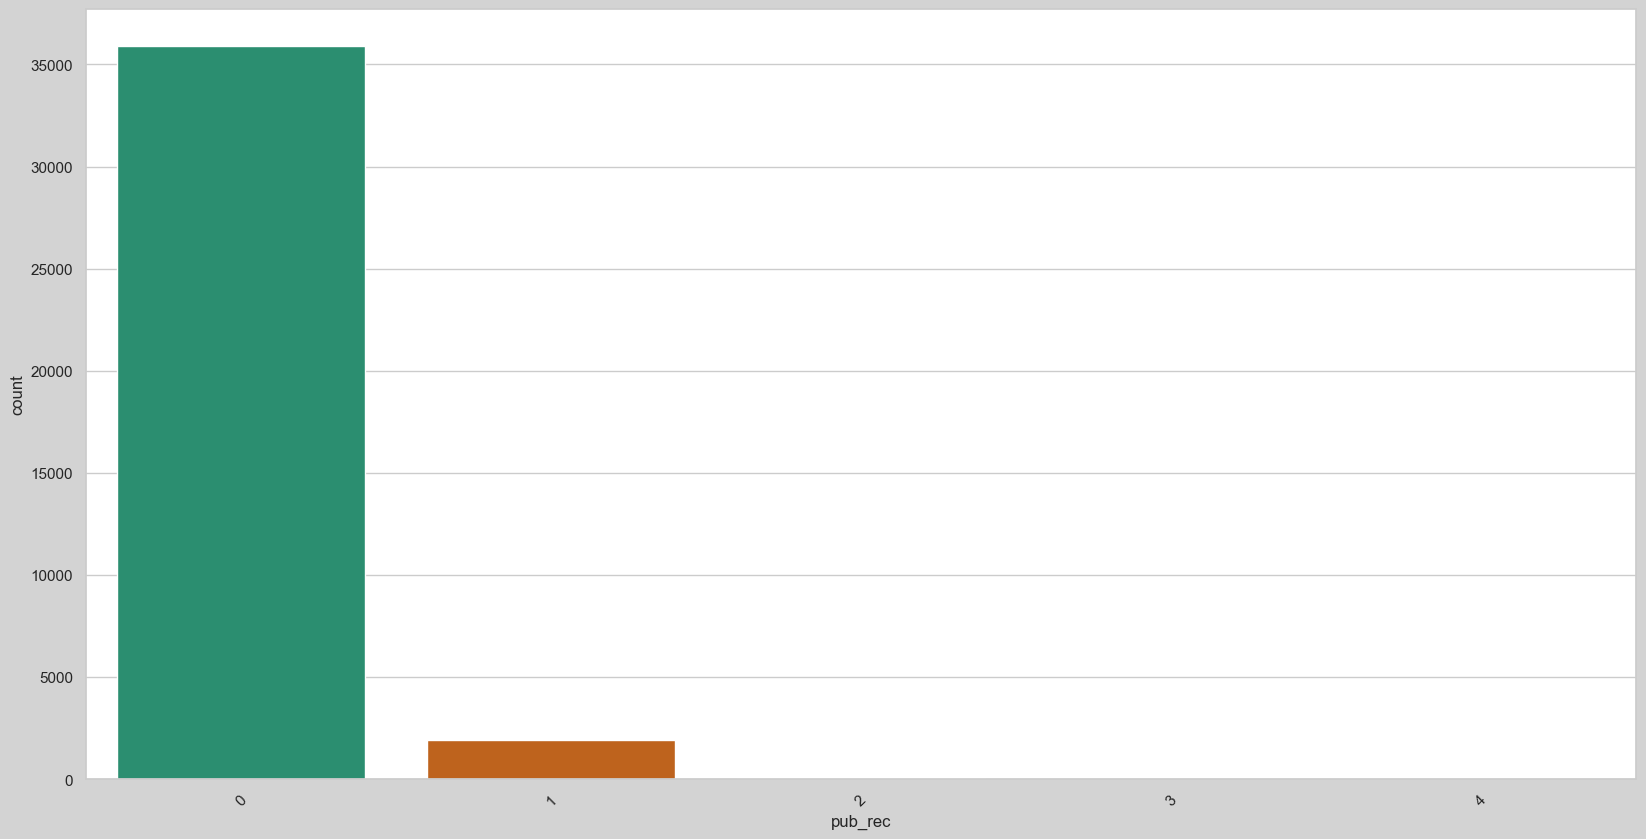

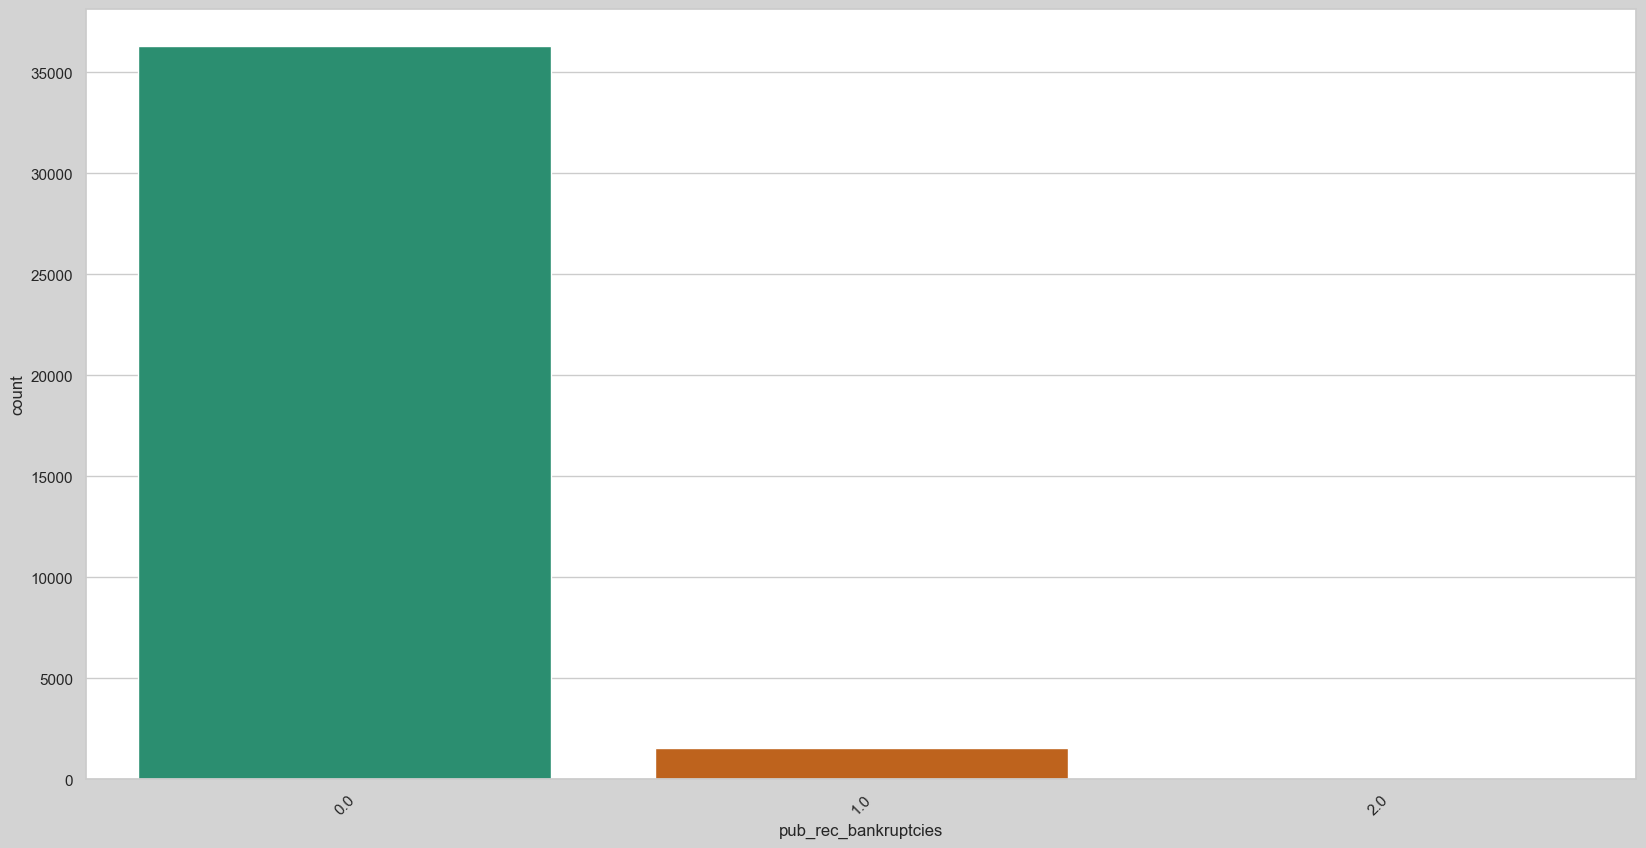

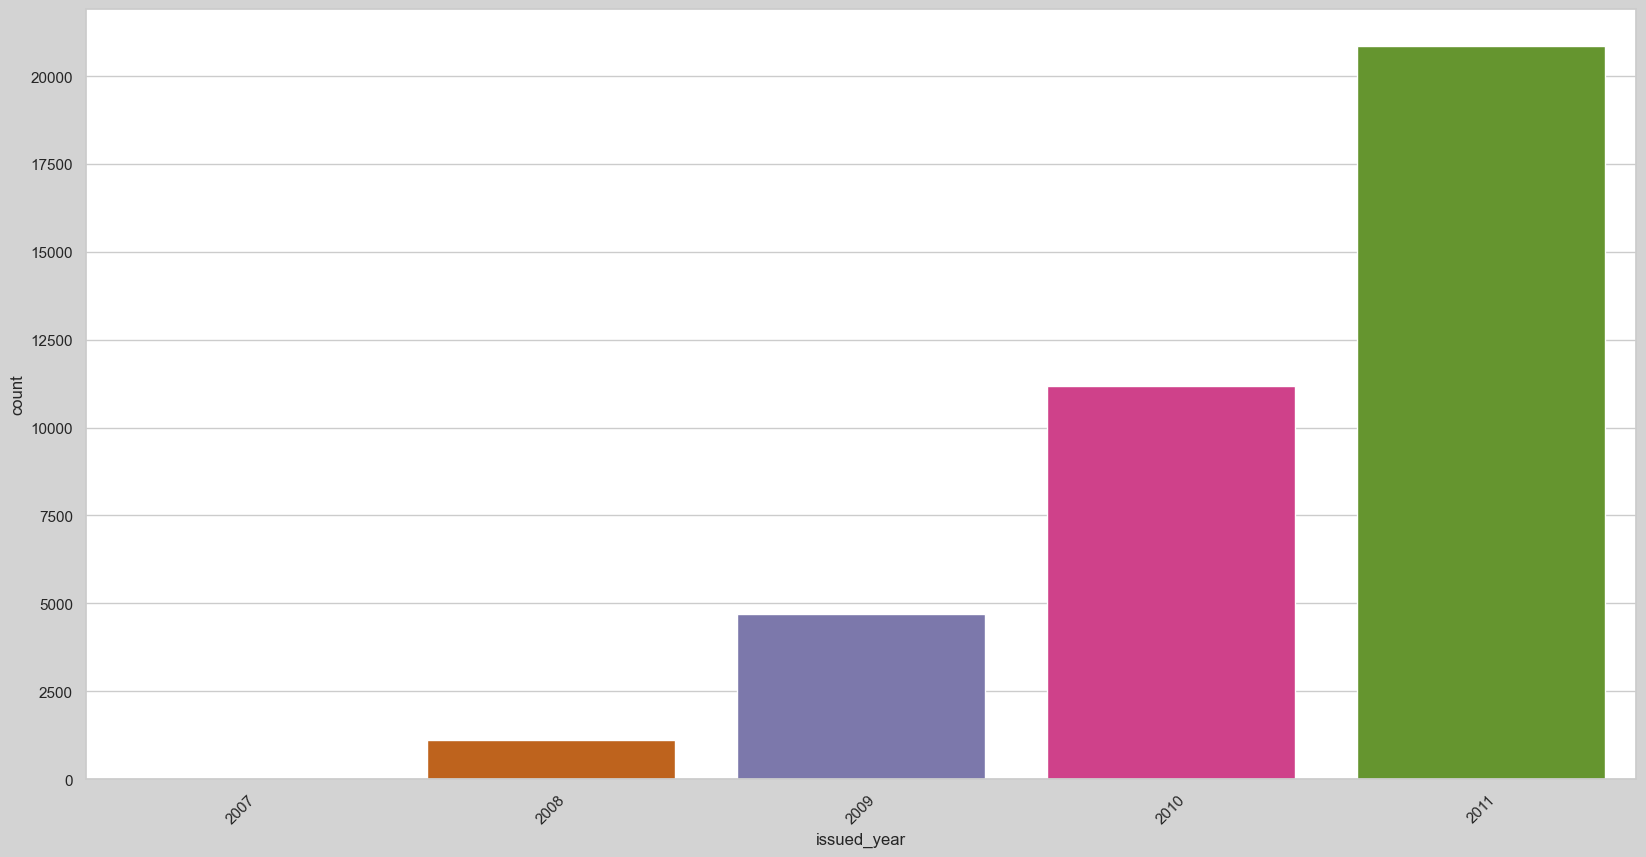

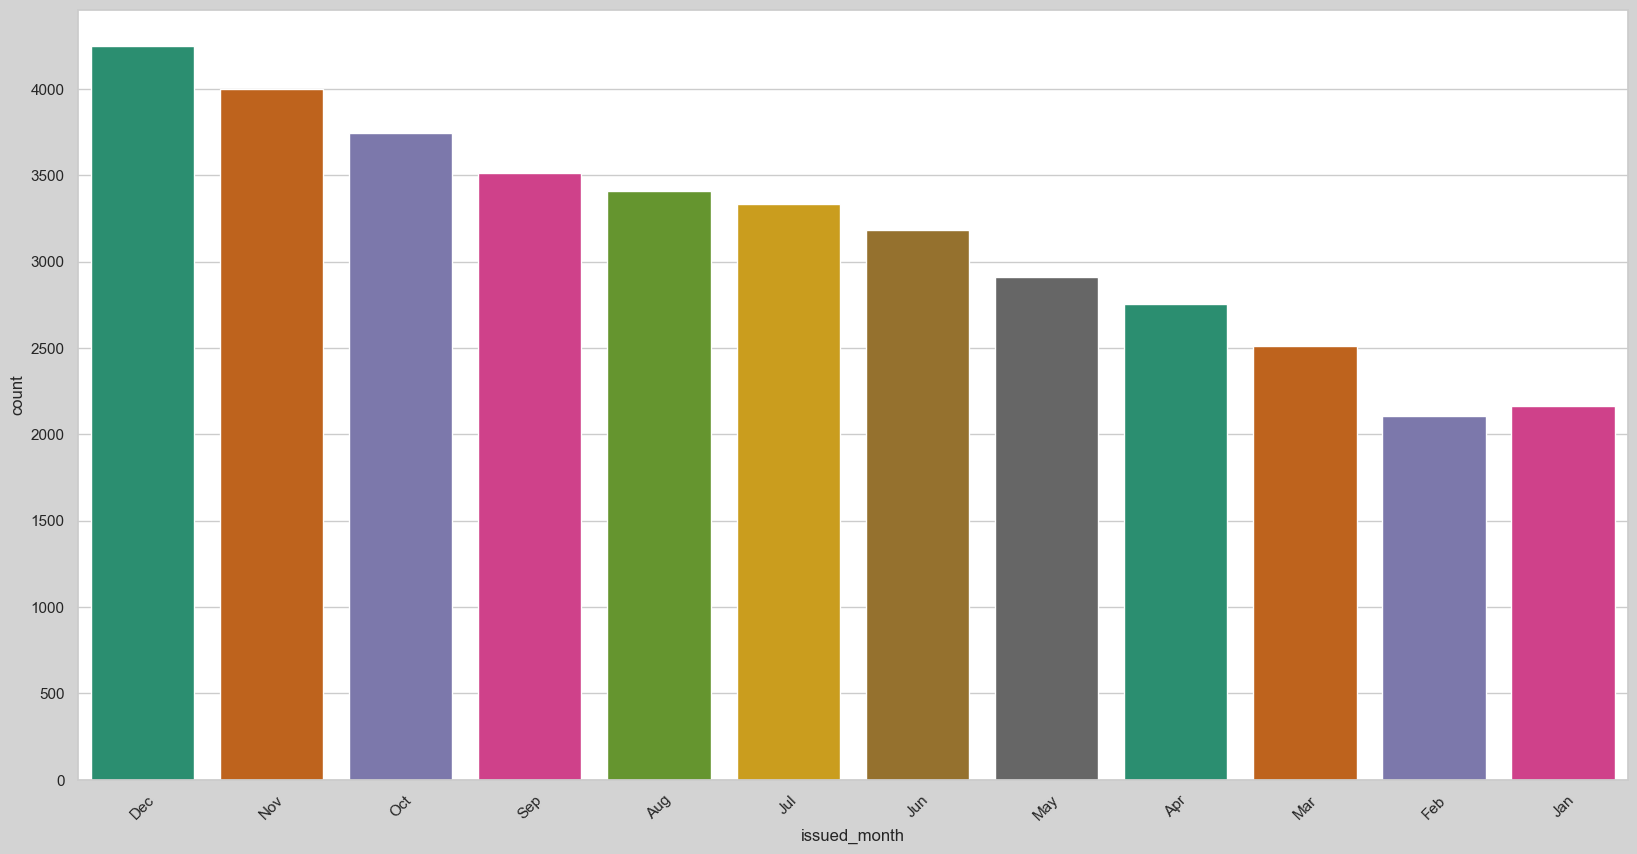

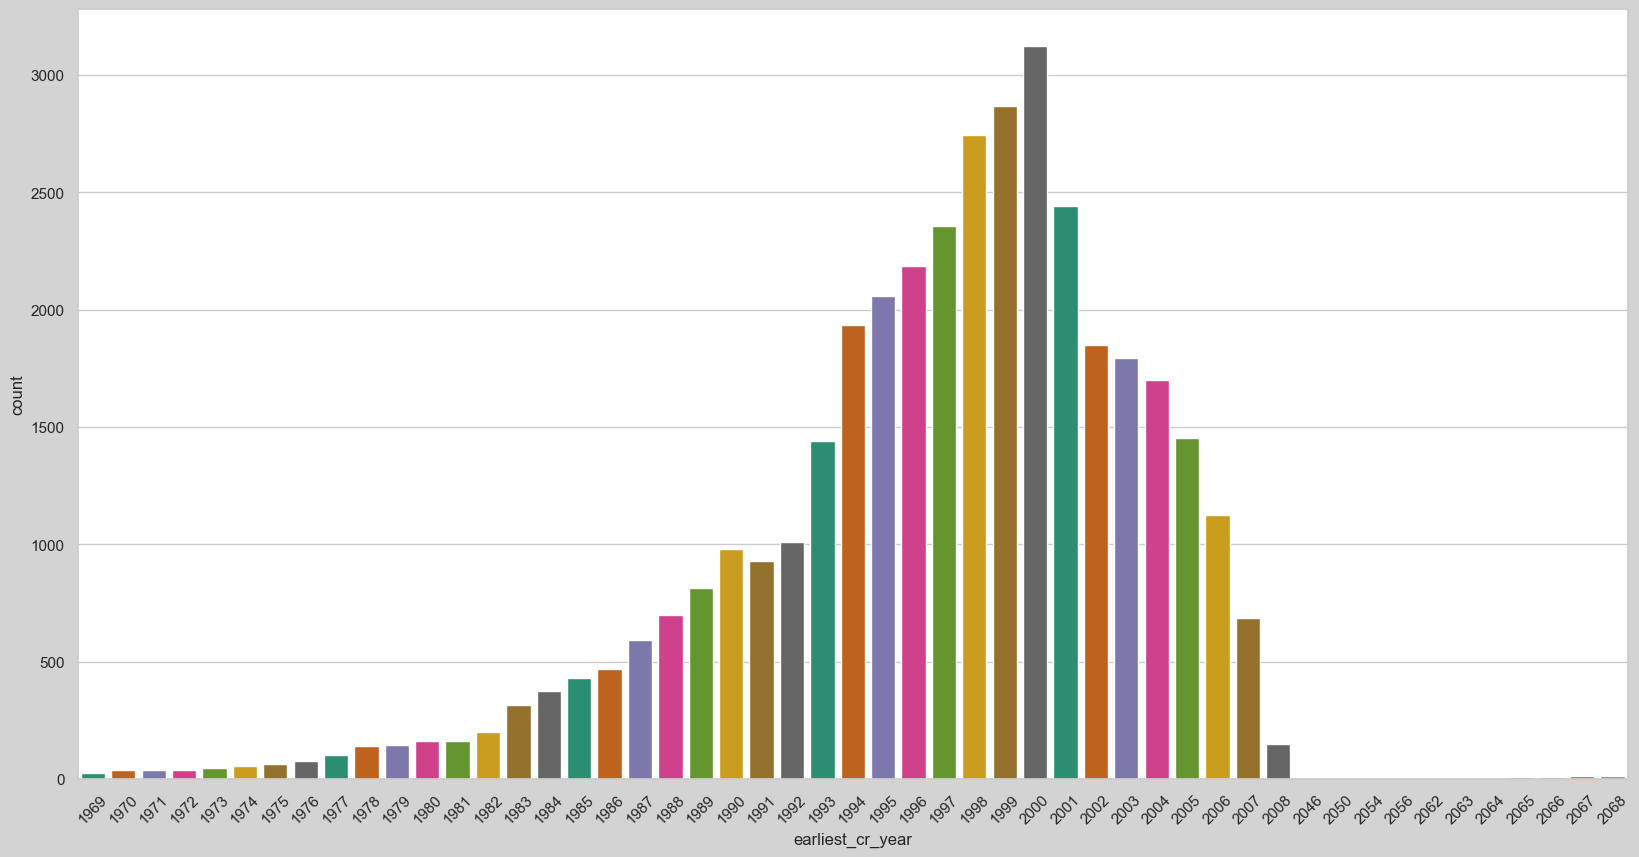

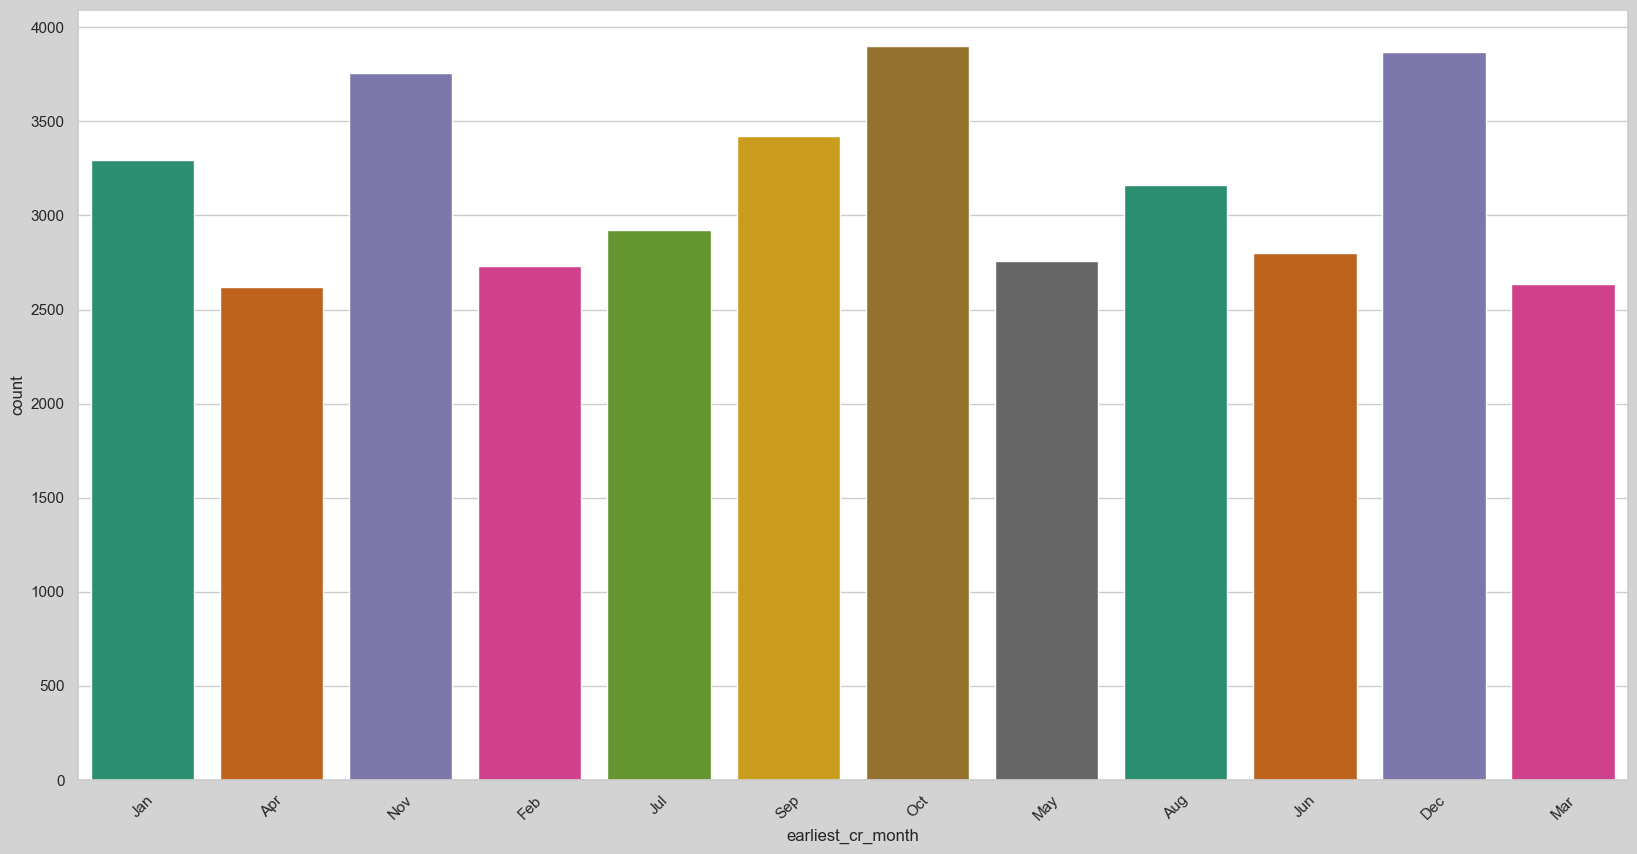

In [1985]:

for col in cat_cols:
    plt.figure(figsize=(20, 10), facecolor='lightgray')
    sns.set(style="whitegrid")
    #sns.countplot(x=col,data = df,hue='loan_status',palette='Dark2')
    sns.countplot(x=col,data = df,palette='Dark2')
    plt.xticks(rotation=45)
    plt.show()

##### Observation from above graphs:

1. Max no. of loans are for the period of 36 months
2. Most of the loans falls under grade B and A
3. Most of the loans are of Subgrade - ‘B3’. Subgrade - ‘A4’ is close behind
4. The loans are taken by most of the people who are having 10+ years employment.
5. Max no. of loans are given to borrowers with ‘rented’ homes. ‘Own’ homes are comparatively very less
6. Max no. of loans are ’Not Verified’
7. Majority of the loans are Fully Paid
8. Max no. of loans are for ‘debt consolidation’
9. Max no. of borrowers are in CA (California)
10. Almost all the the records have ‘delinq_2yrs’ as 0, so it is not worth analysing this variable
11. Majority of the loans have 0 inquiries in last 6 months
12. Almost all of the records have 0 pub_rec so it is not worth analysing this variable
13. Almost all of the records have 0 pub_rec_bankruptcies so it is not worth analysing this variable
14. The highest number of loans are sanctioned in 2011.
15. There is a linear growth in the number of loans from Jan to Dec. Dec being the highest.
16. Majority of the loans have the earliest_cr_line in year 2000.
17. Majority of the loans have the earliest_cr_line in Oct.

#### Numerical

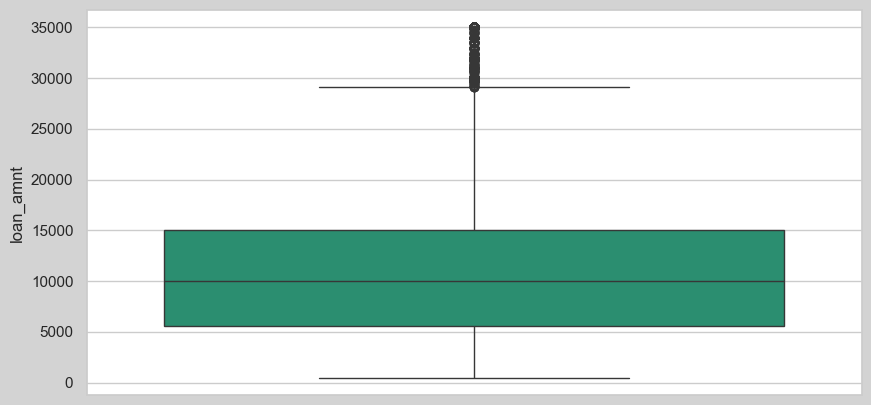

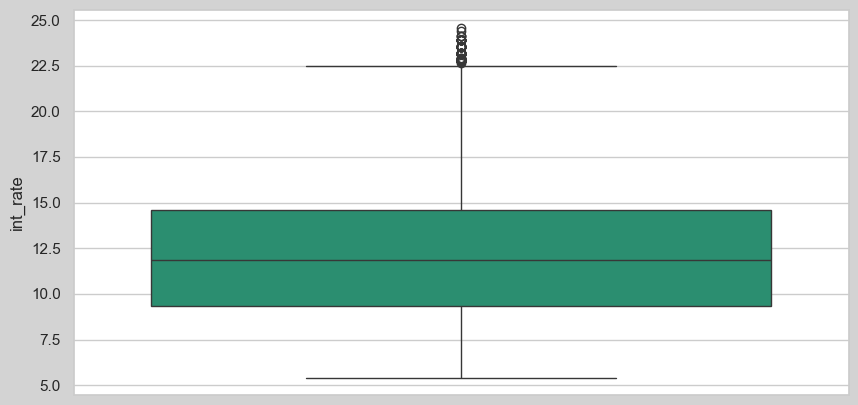

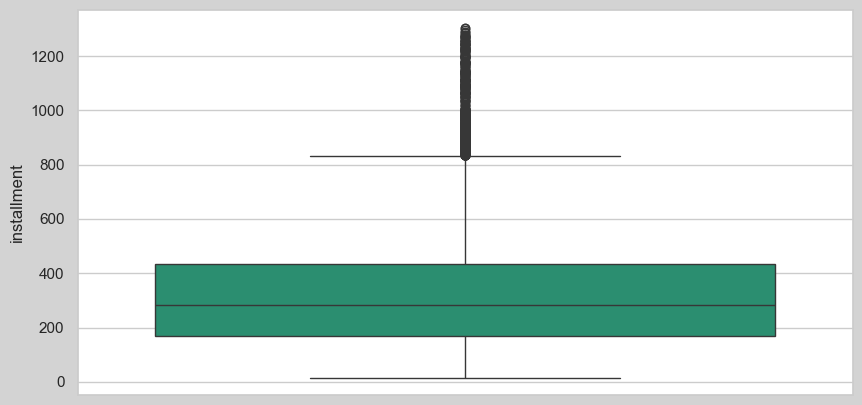

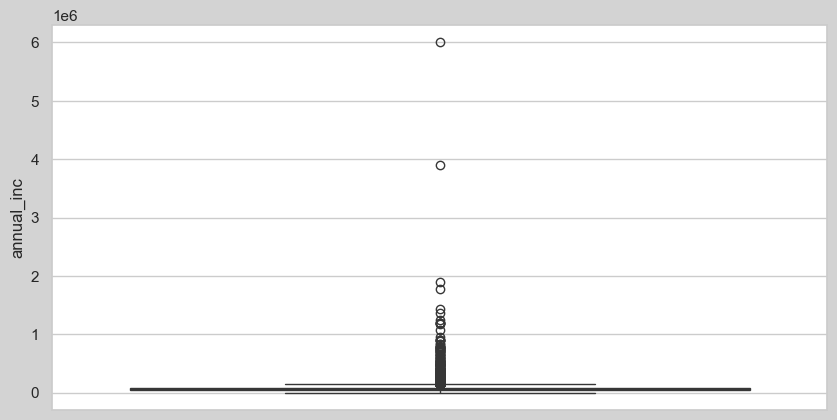

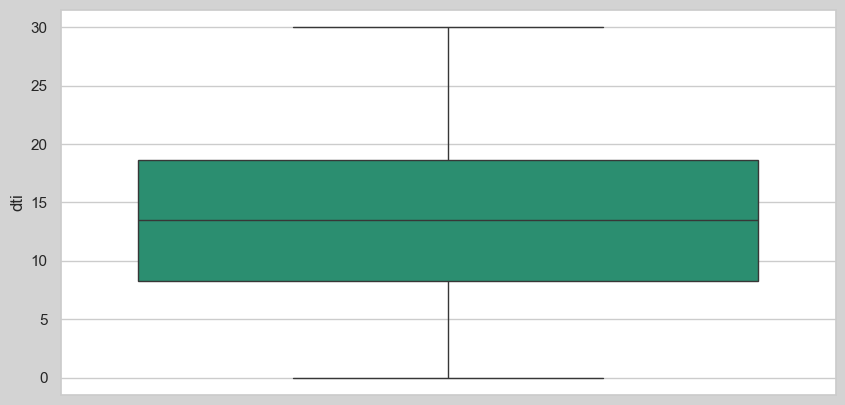

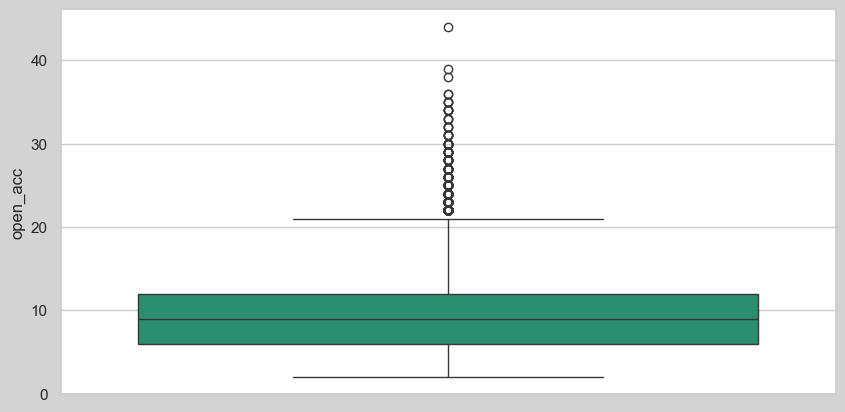

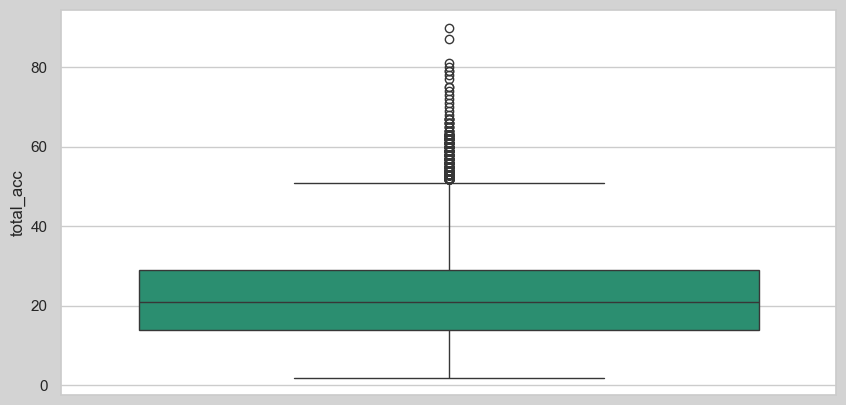

In [2004]:
for col in num_cols:
    plt.figure(figsize=(10, 5), facecolor='lightgray')
    sns.set(style="whitegrid")
    sns.boxplot(df[col], palette='Dark2')
    plt.show()

#### Observations from above graphs:

1. Majority of the loans are for a loan amount of >5000 to 15000
2. Majority of the loans are for int_rate between 9-14.5
3. Max no.of installments lie in the range of 180-420
4. Max no.of loans are for dti in the range of 8-18
5. There are a significant number of outliers extending far beyond the upper whisker, which indicates the presence of high-income individuals.
6. Max no. of loans are for borrowers having 6-12 open_acc.
7. Max loans are for borrowers having total_acc around 14-30

### Analysis using box plot

### For variable: loan_amnt

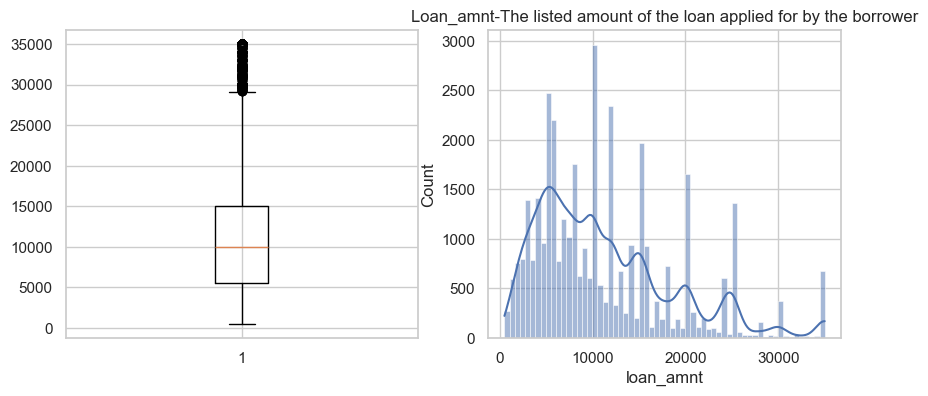

In [1945]:
plt.figure(figsize=(10,4))
sns.set(style="whitegrid", palette="deep")
plt.subplot(1,2,1)
plt.boxplot(df.loan_amnt)

plt.subplot(1,2,2)
sns.histplot(df.loan_amnt,kde=True)
plt.title('Loan_amnt-The listed amount of the loan applied for by the borrower')
plt.show()


#### Observation - Values seem continous so no need to remove outliers. this indicates that most of the loans were taken from 5000 to 15000 range.

### For varaible: funded_amnt

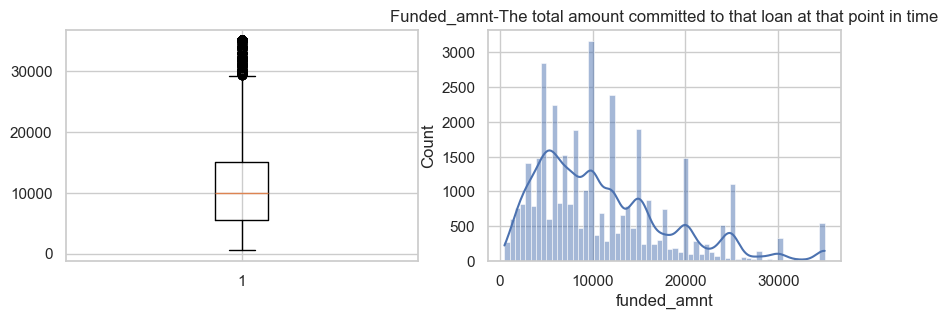

In [1948]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.boxplot(df.funded_amnt)
plt.subplot(1,2,2)
sns.histplot(df.funded_amnt,kde=True)
plt.title('Funded_amnt-The total amount committed to that loan at that point in time')
plt.show()

#### Observation - Values seem continious so no need to remove outliers. this indicates that most of the funds were from around 5000 to 15000 range.

### For variable: int_rate

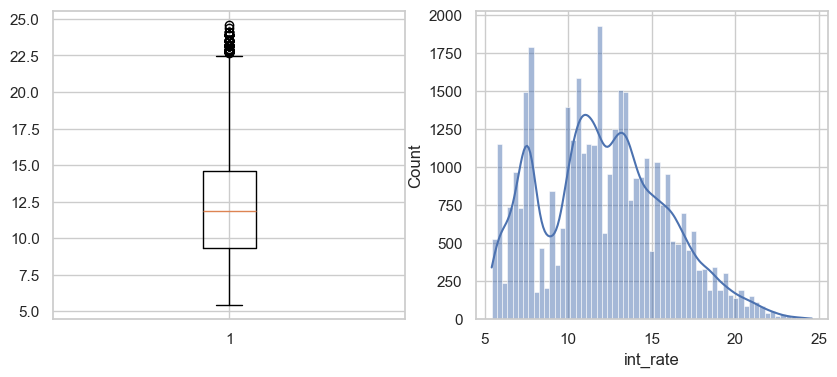

In [1951]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(df.int_rate)
plt.subplot(1,2,2)
sns.histplot(df.int_rate,kde=True)
plt.show()

#### Observation - This indicates that most of the interest rate on loan lies between 9%-14%¶

### For Variable: installment

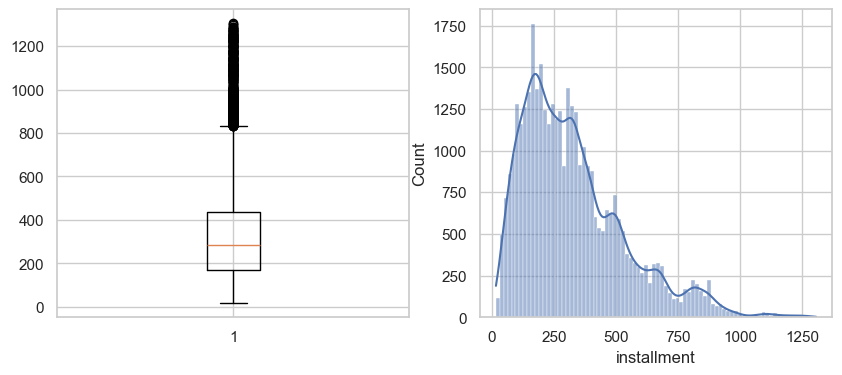

In [1953]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(df.installment)
plt.subplot(1,2,2)
sns.histplot(df.installment,kde=True)
plt.show()

In [1959]:
df["installment"].describe()

count    37879.000000
mean       326.946906
std        209.080346
min         16.080000
25%        168.670000
50%        282.960000
75%        434.575000
max       1305.190000
Name: installment, dtype: float64

#### Observation: This indicates most of the monthly installments lies between 168-434

### For Variable: annual_inc

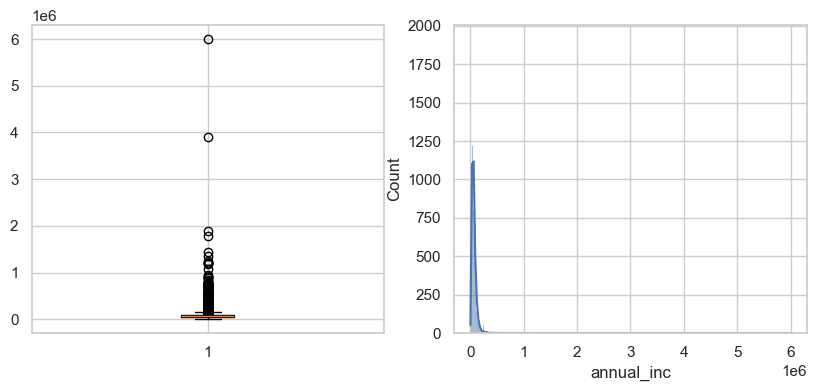

In [1962]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(df.annual_inc)
plt.subplot(1,2,2)
sns.histplot(df.annual_inc,kde=True)
plt.show()

In [1964]:
df["annual_inc"].describe()

count    3.787900e+04
mean     6.964638e+04
std      6.365101e+04
min      4.000000e+03
25%      4.171980e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Observation: There are a significant number of outliers extending far beyond the upper whisker, which indicates the presence of high-income individuals. The boxplot helps to visualize the spread and the presence of these outliers more effectively than the histogram alone.

### For variable : dti

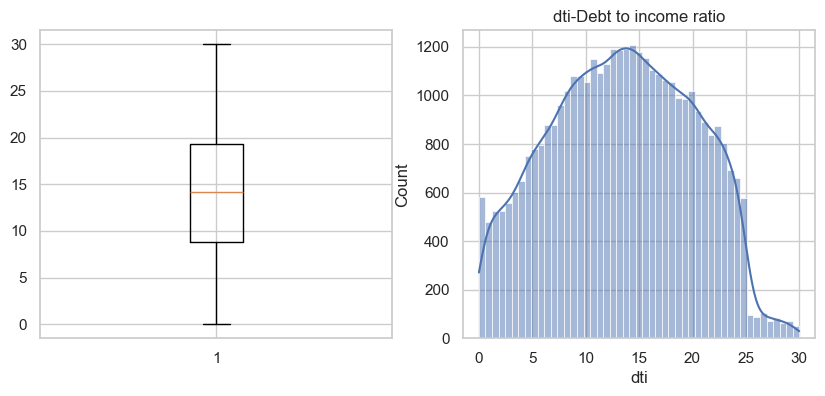

In [1968]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(Loan_data.dti)
plt.subplot(1,2,2)
sns.histplot(df.dti,kde=True)
plt.title('dti-Debt to income ratio')
plt.show()

#### Observation: This indicates most of the loan customers have dti ratio from 9 to 19. There seems to be a normal distribution however there is sudden decline after 25

### For variable: verification_status

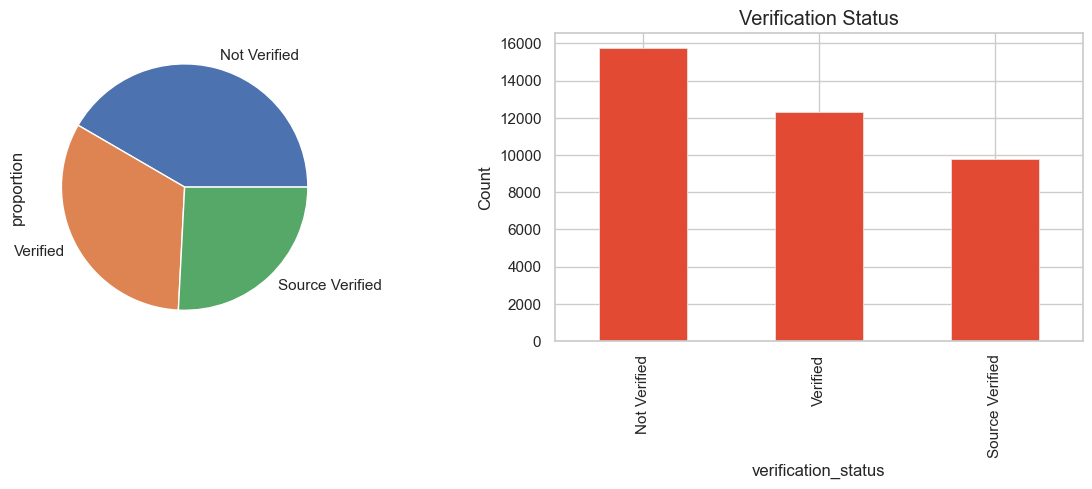

In [1970]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df['verification_status'].value_counts(normalize=True).plot.pie()

plt.subplot(1,2,2)
plt.style.use('ggplot')
df['verification_status'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Verification Status')

plt.show()

In [1972]:
df['verification_status'].value_counts()

verification_status
Not Verified       15768
Verified           12334
Source Verified     9777
Name: count, dtype: int64

### Observation: This shows that there are a majority of 15768 loans that were not varified by LC

## Bivariate Analysis

### Categorical against LoanStatus

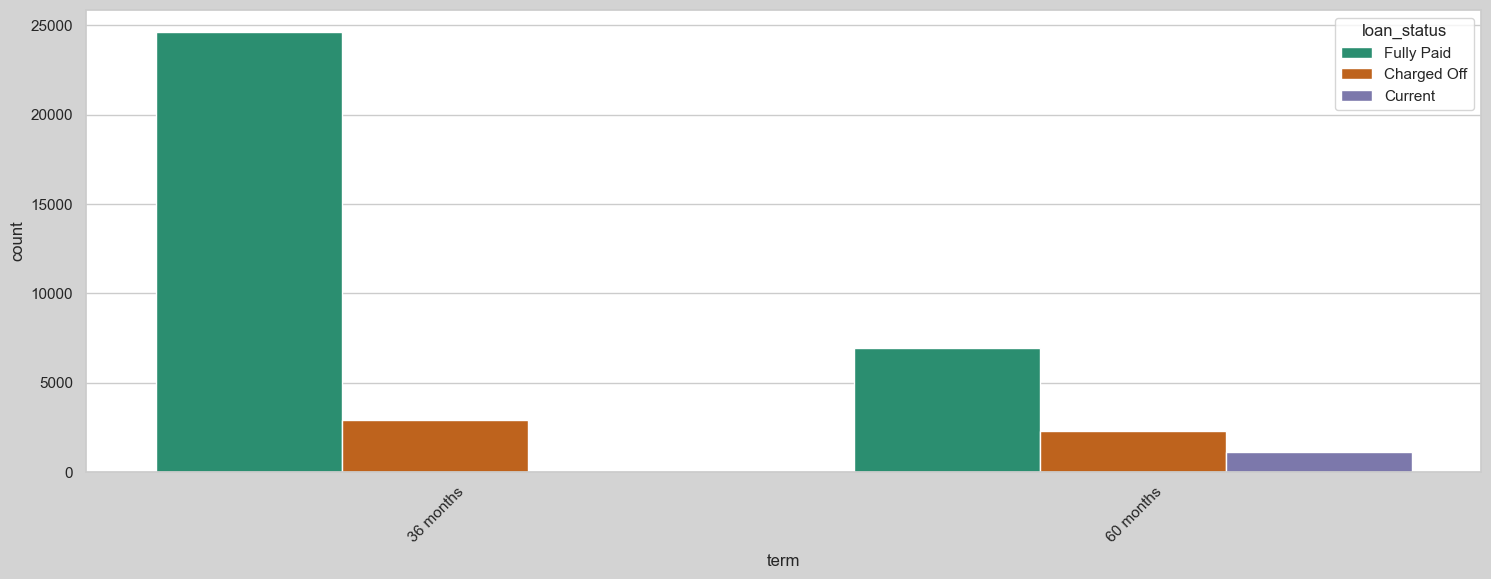

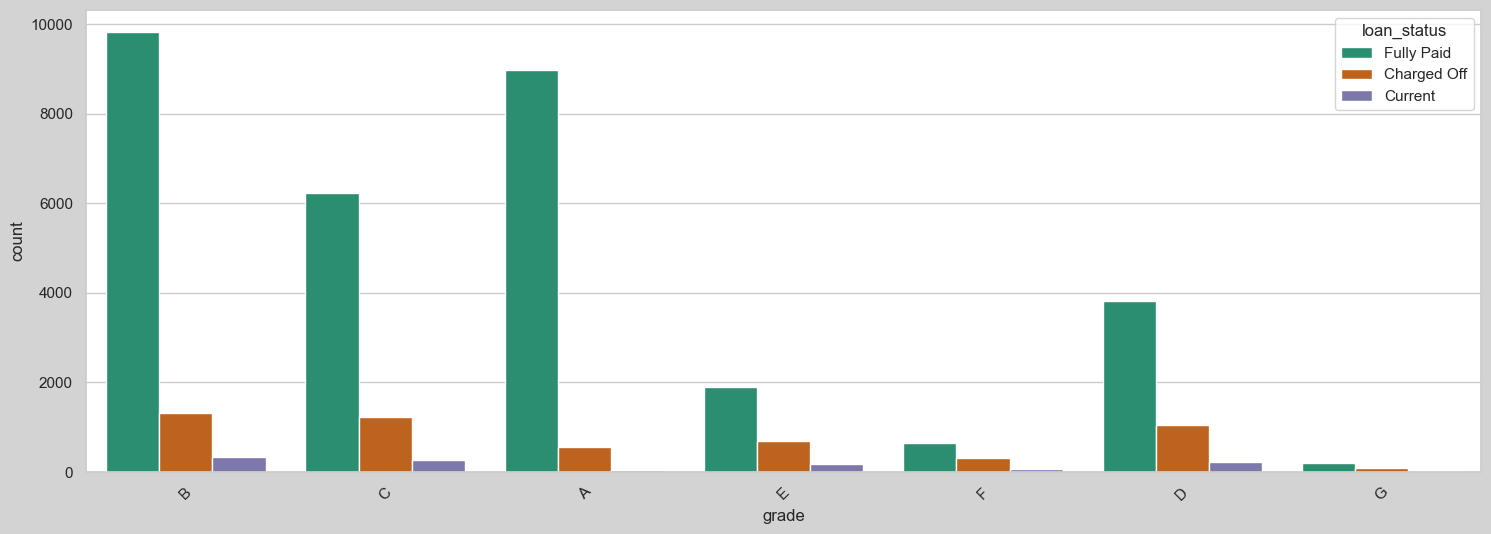

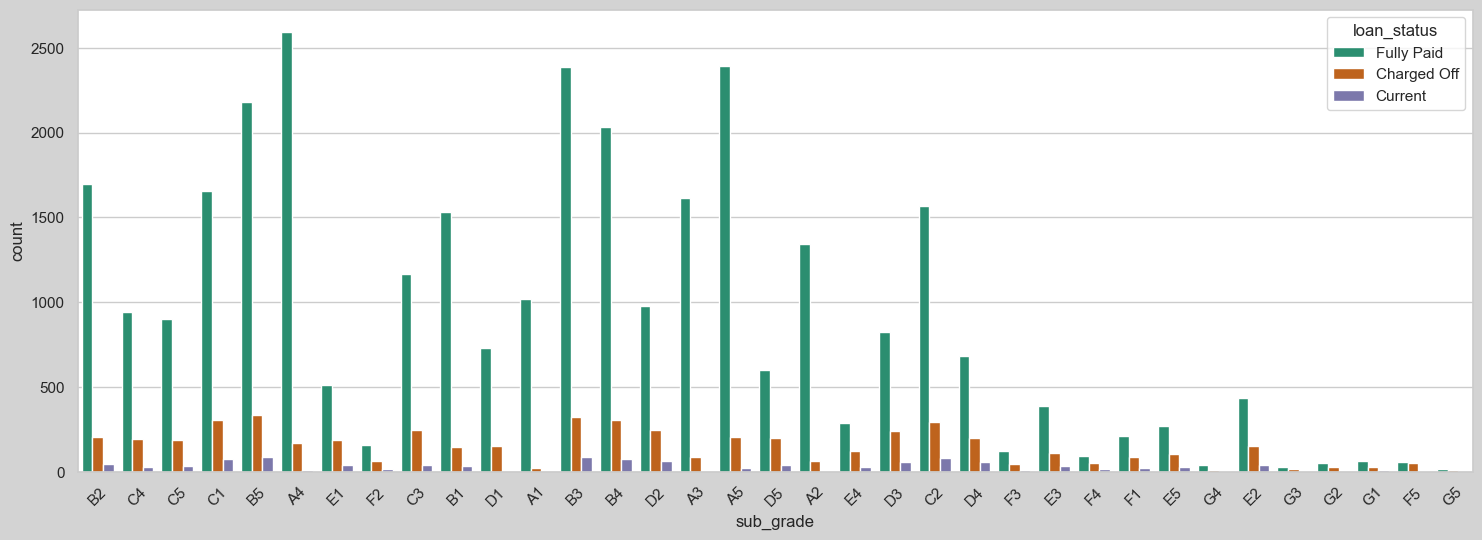

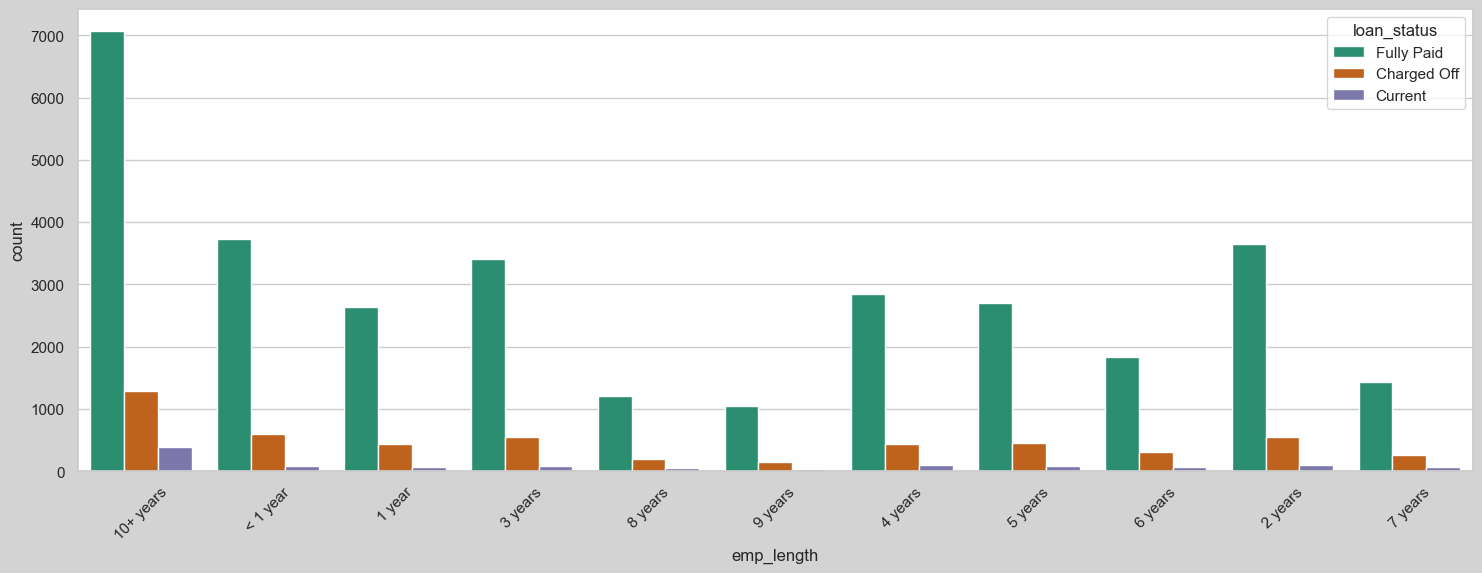

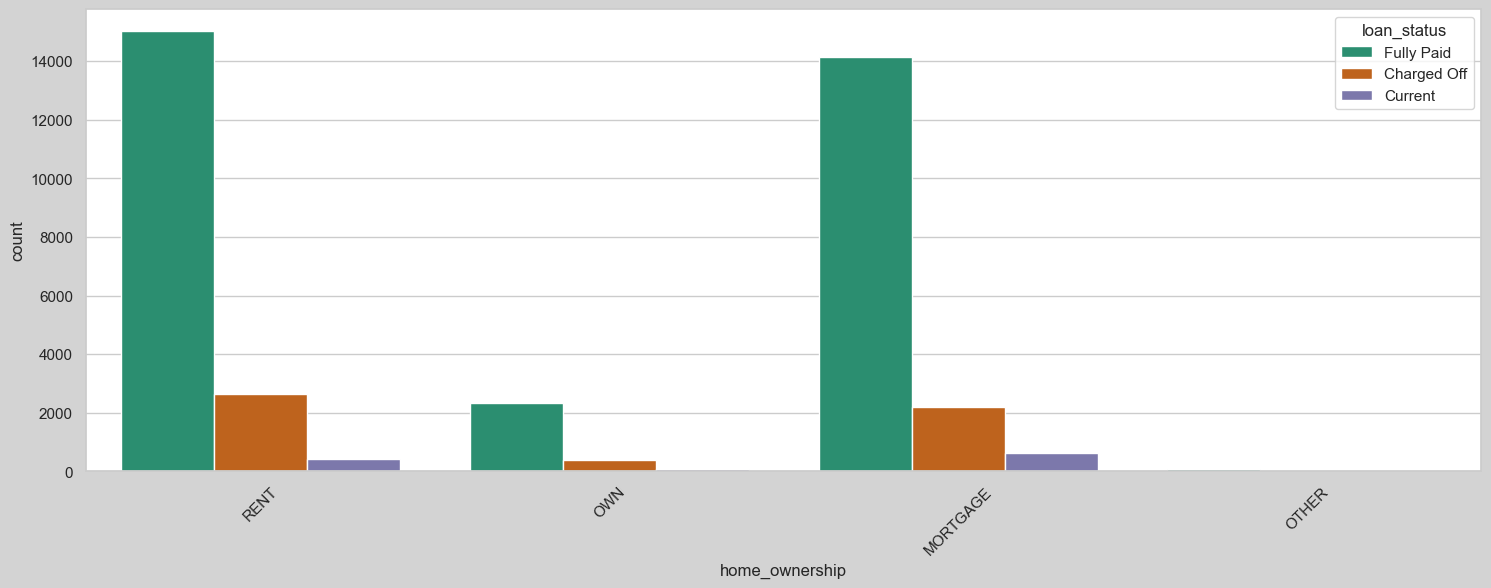

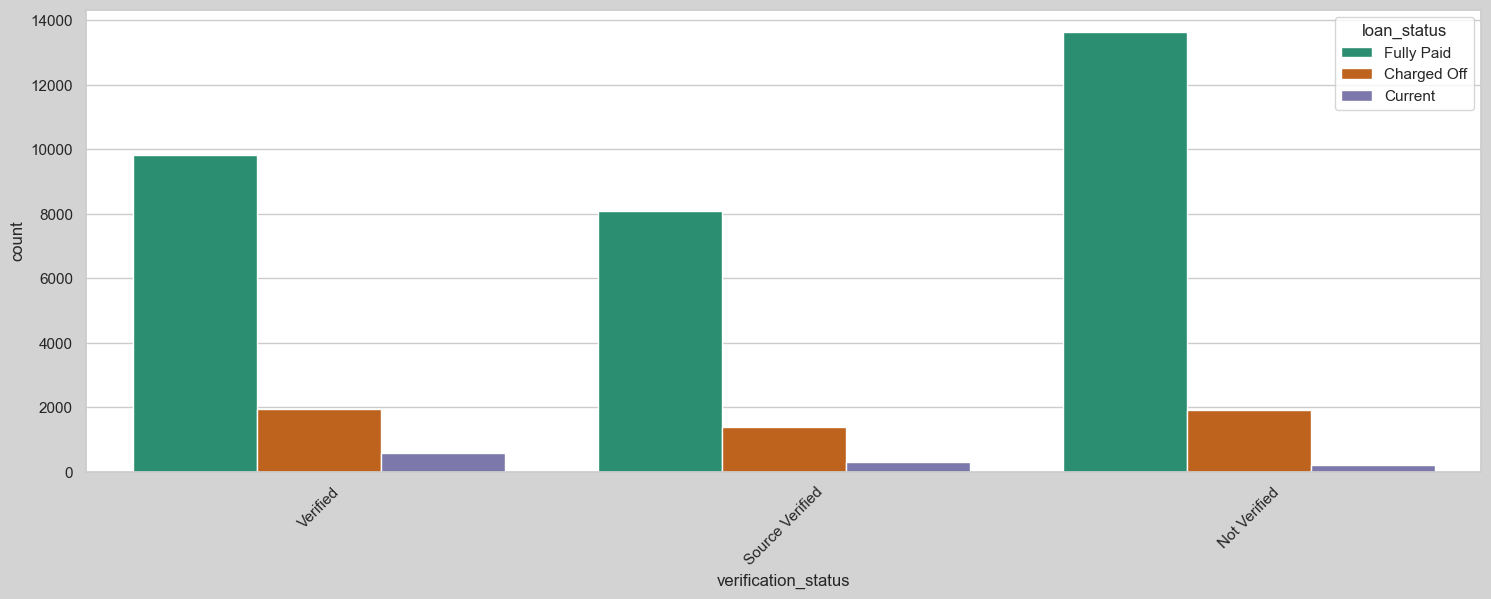

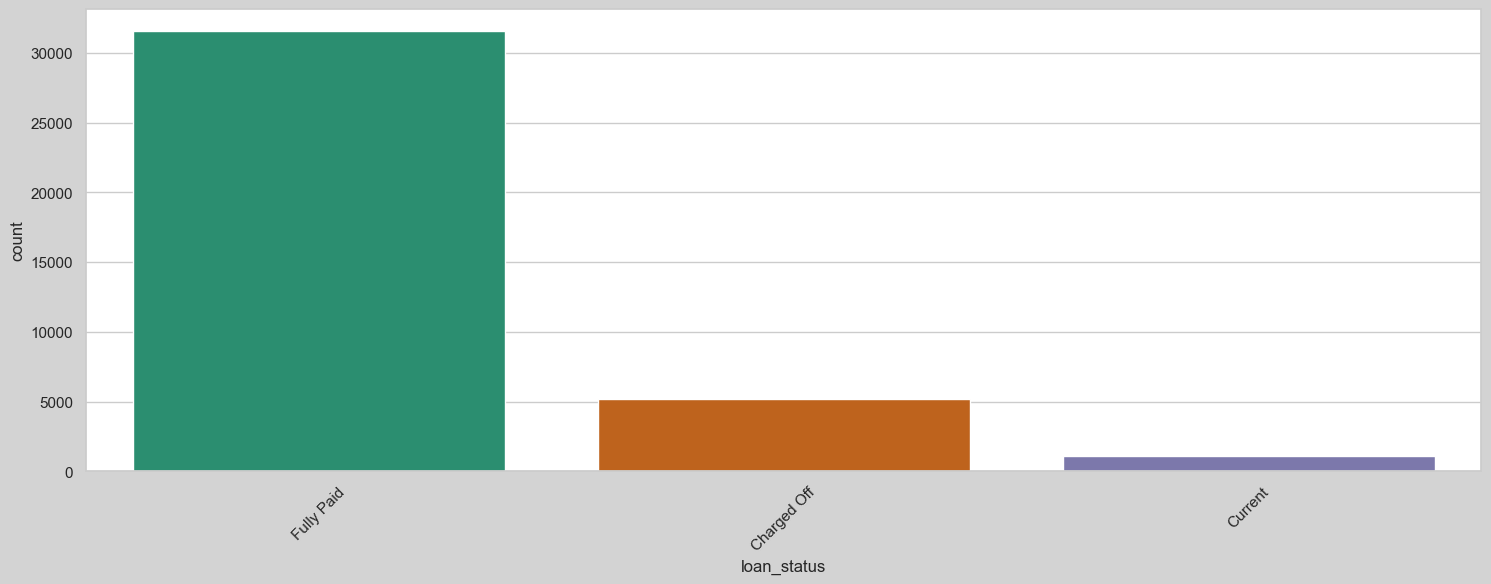

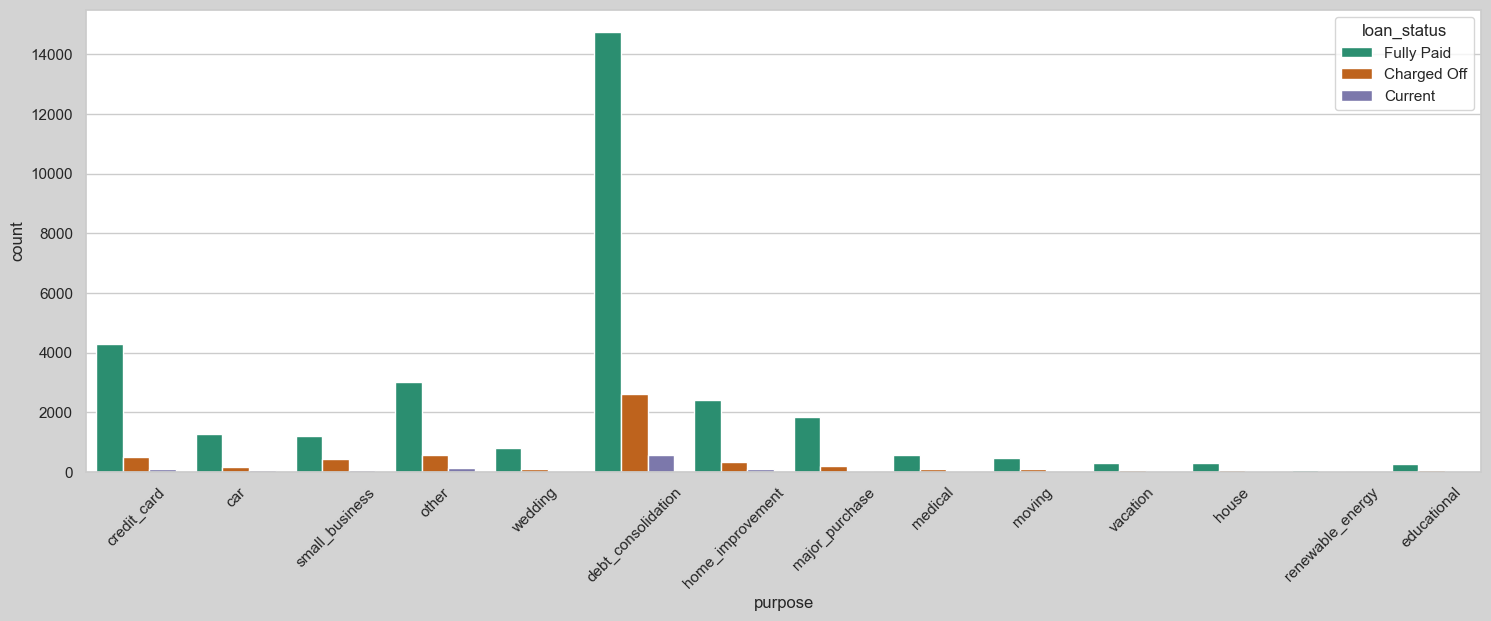

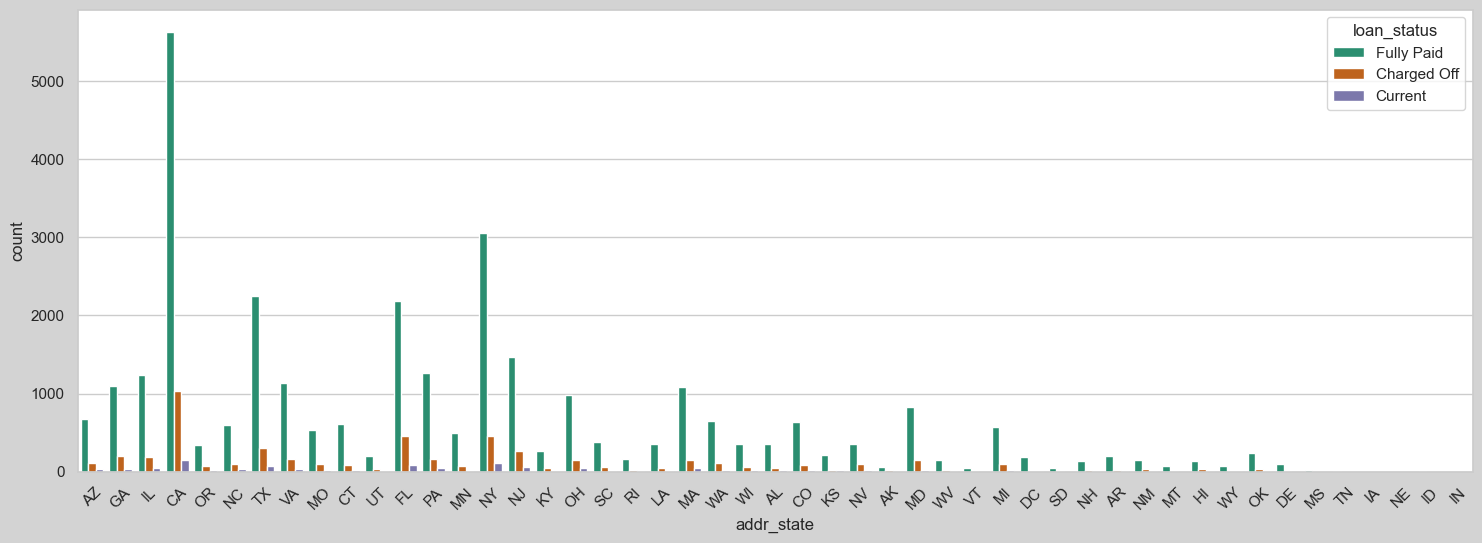

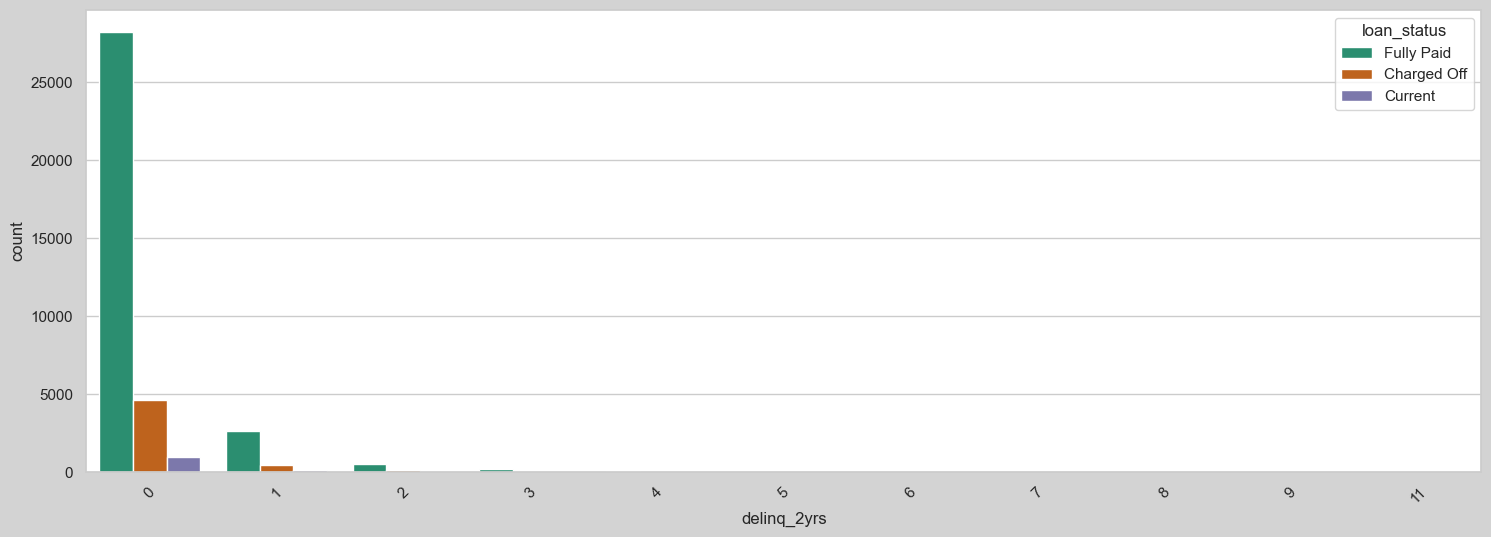

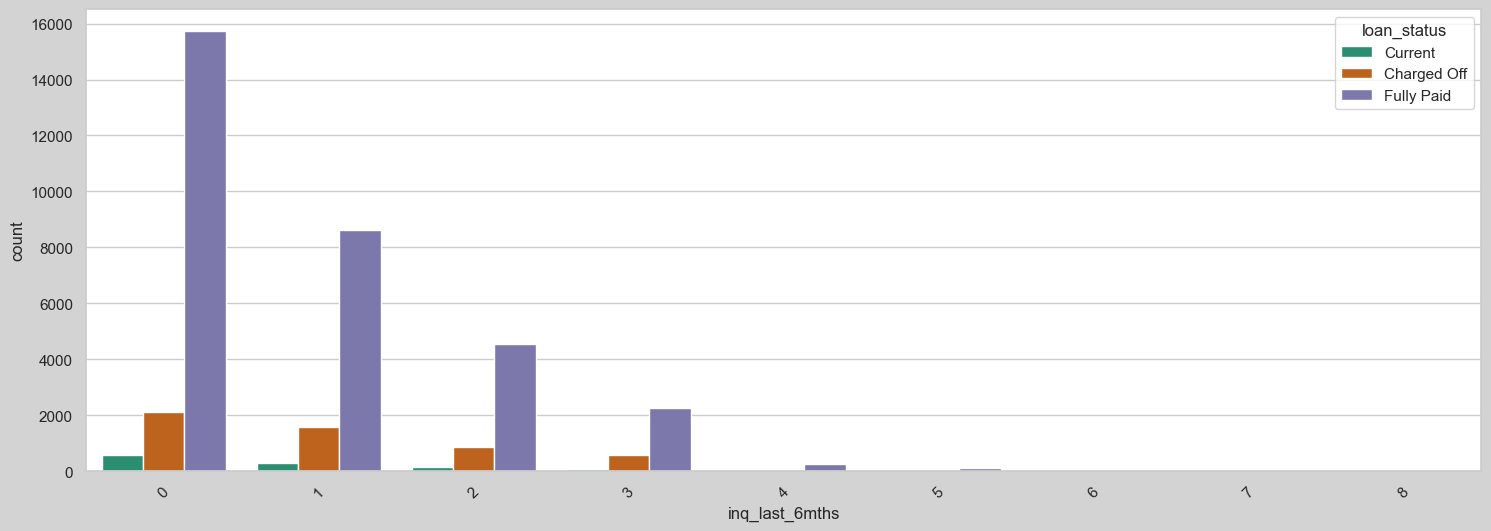

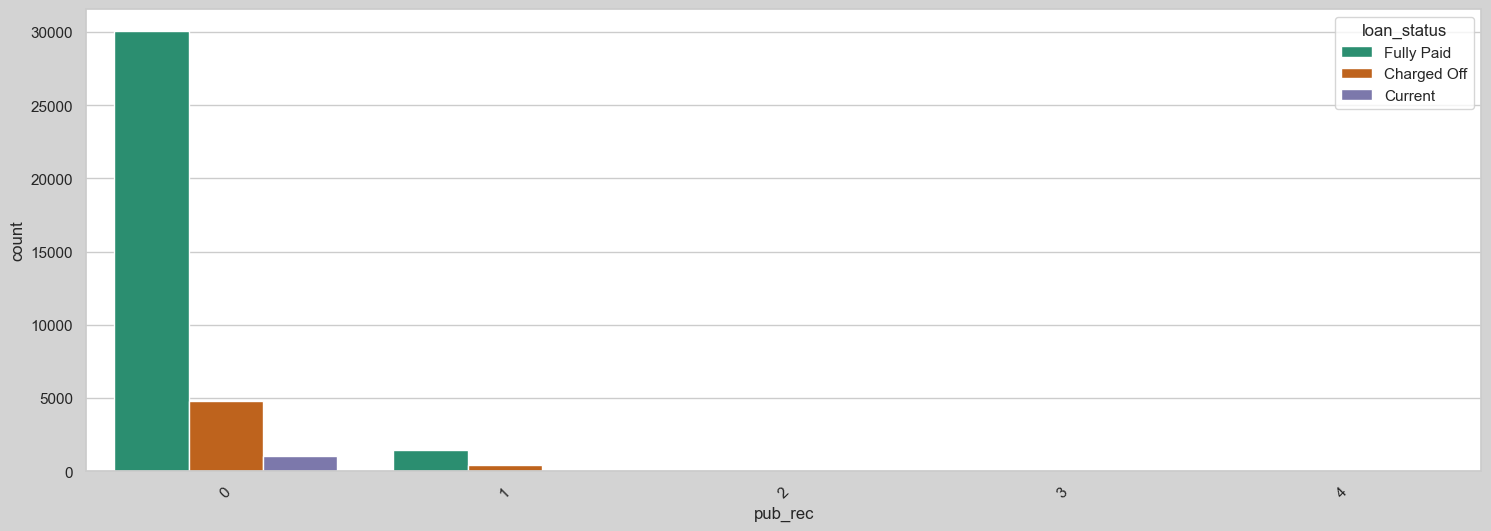

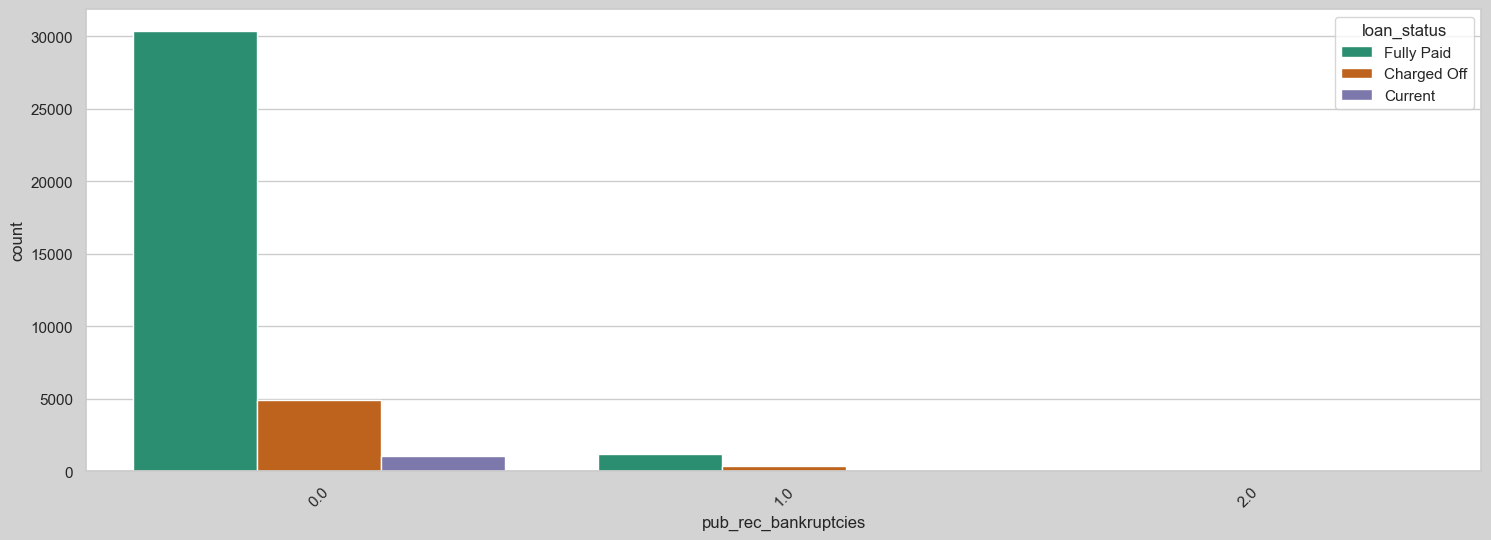

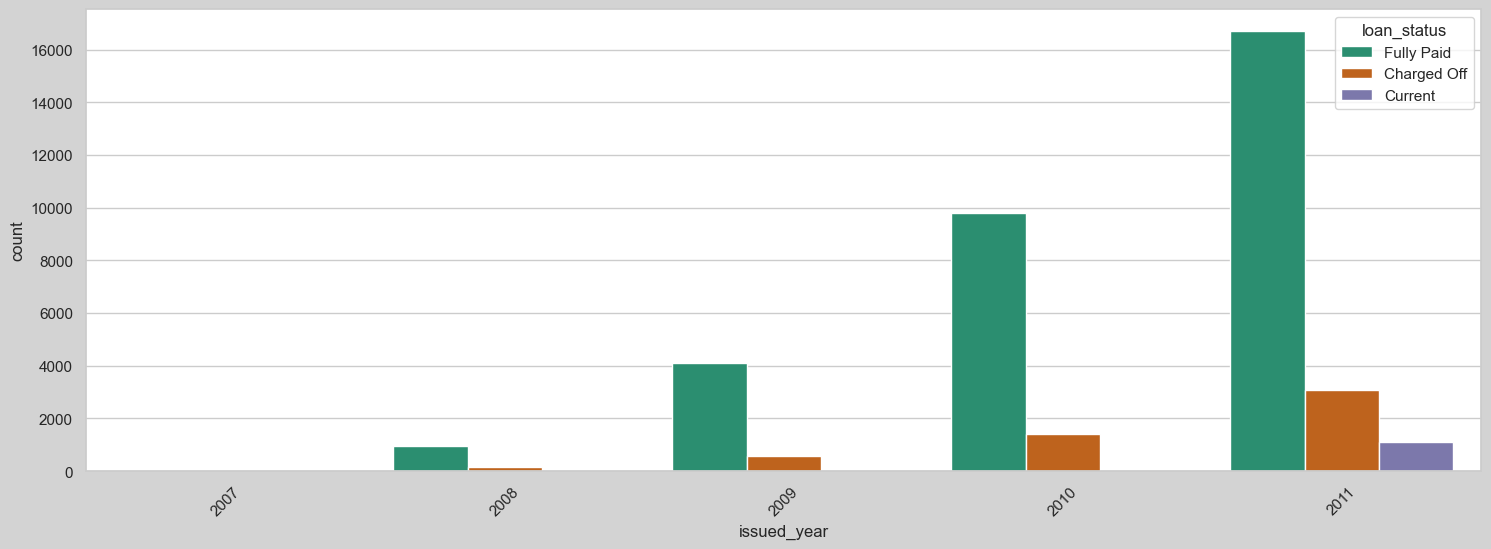

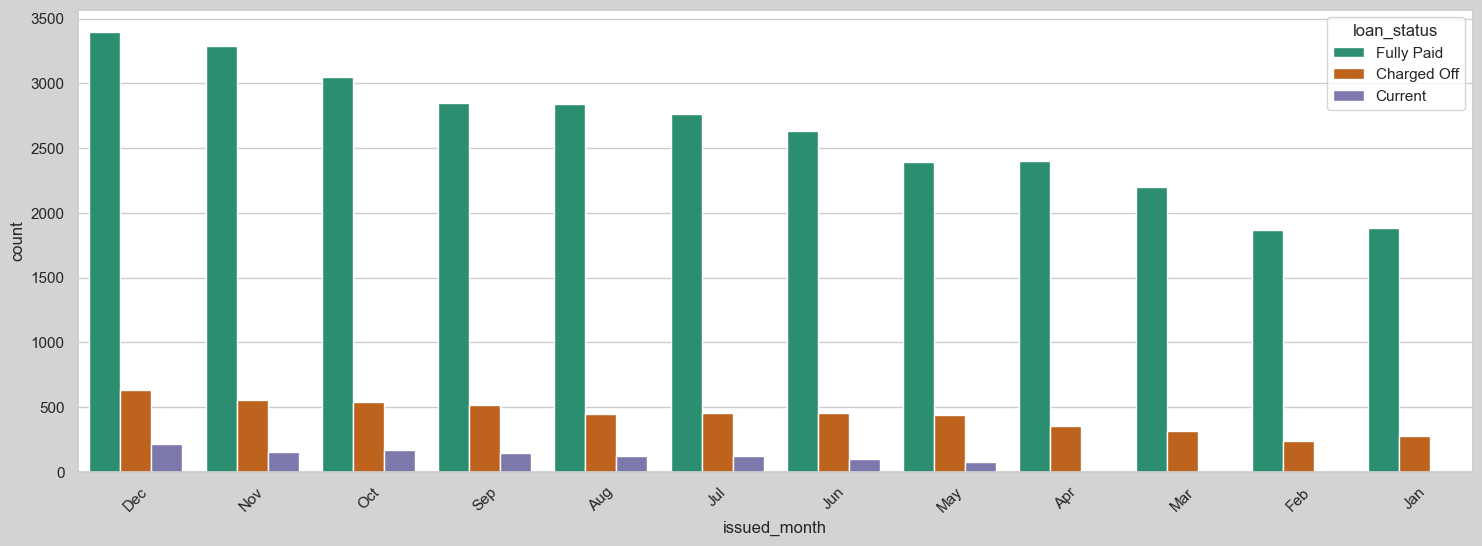

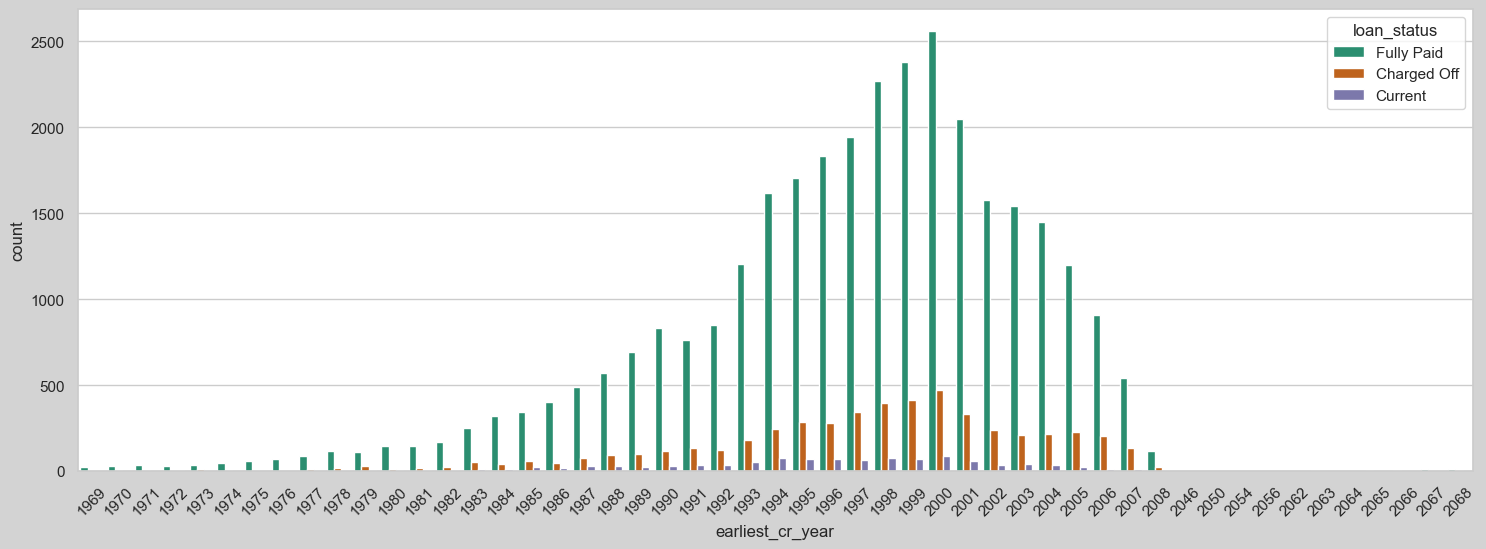

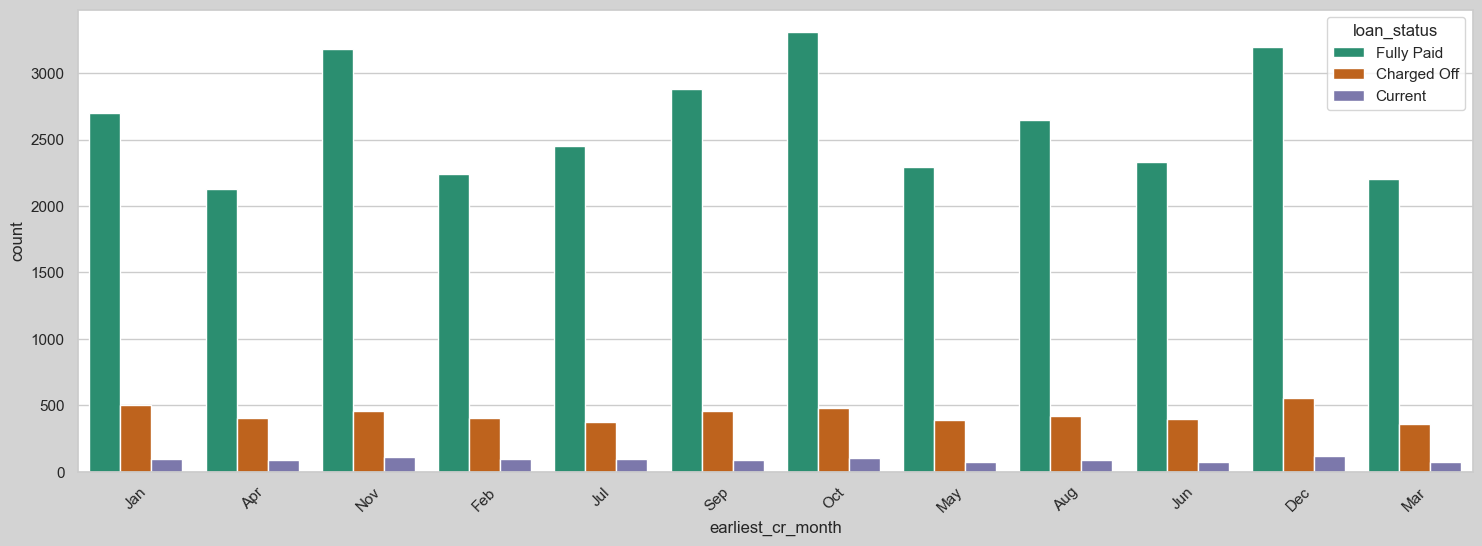

In [2009]:
for col in cat_cols:
    plt.figure(figsize=(18, 6), facecolor='lightgray')
    sns.set(style="whitegrid")
    sns.countplot(x=col,data = df,hue='loan_status',palette='Dark2')
    plt.xticks(rotation=45)
    plt.show()

#### Inferences from above graphs:

1. Compared with the fully paid, the probability of defaulting is more for 60 months term
2. Compared with the fully paid, the probability of defaulting is more for Grade ‘B’ and 'C'.
3. The top 5 bars of defaulters are for Subgrades 'B5','B3','B4','C1'and 'C2'. Hence, making point 2 more strong.
4. emp_length of 10+ years are far more defaulters compared to others.
5. defaulters with ‘rented’ homes are more than 'mortgaged' house. ‘Own’ homes are comparatively very less
6. Probability of verified loans to default are more than source verified. Not verified loans are also close behind to default.
7. Max no. of defaulters are for ‘debt consolidation’
8. Max no. of defaulters are in CA (California)
9. Almost all the defaulters have ‘delinq_2yrs’ as 0
10. Majority of the defaulters have 0 inquiries in last 6 months
11. Almost all of the defaulters have 0 pub_rec
12. Almost all of the defaulters have 0 pub_rec_bankruptcies

#### Numerical vs Loan Status

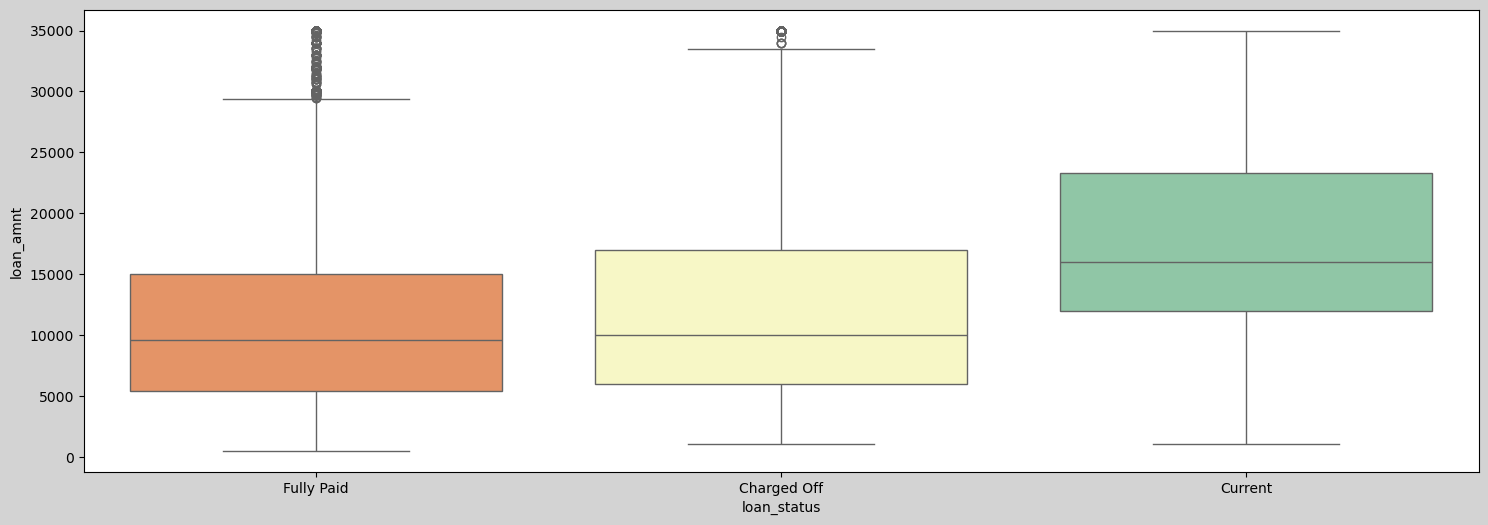

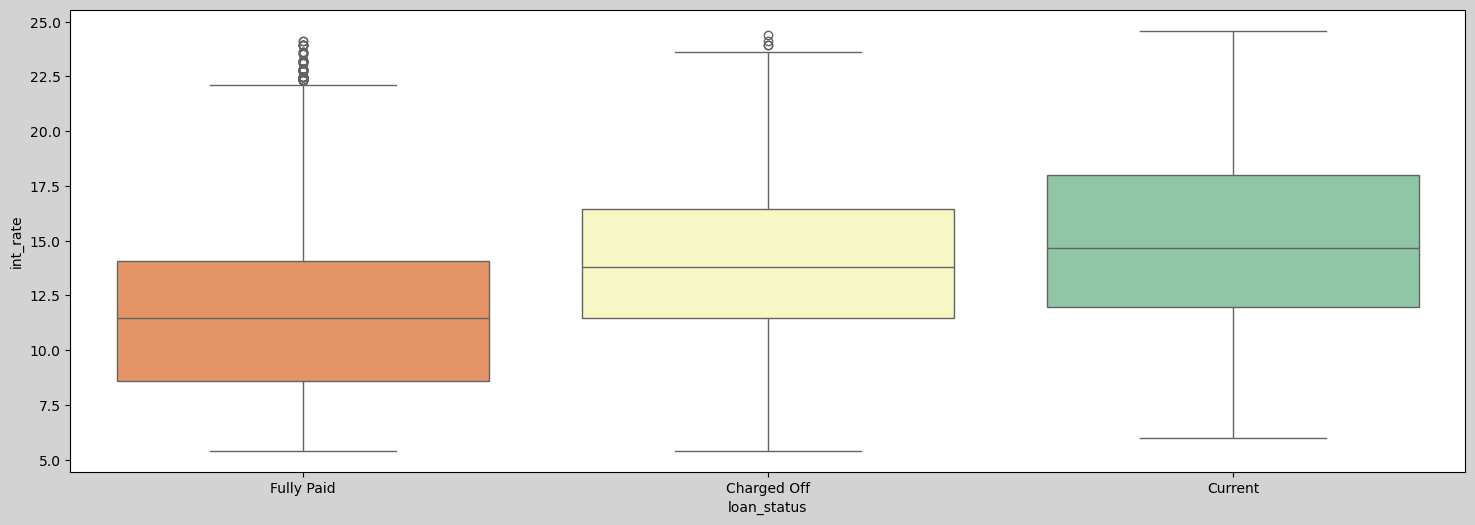

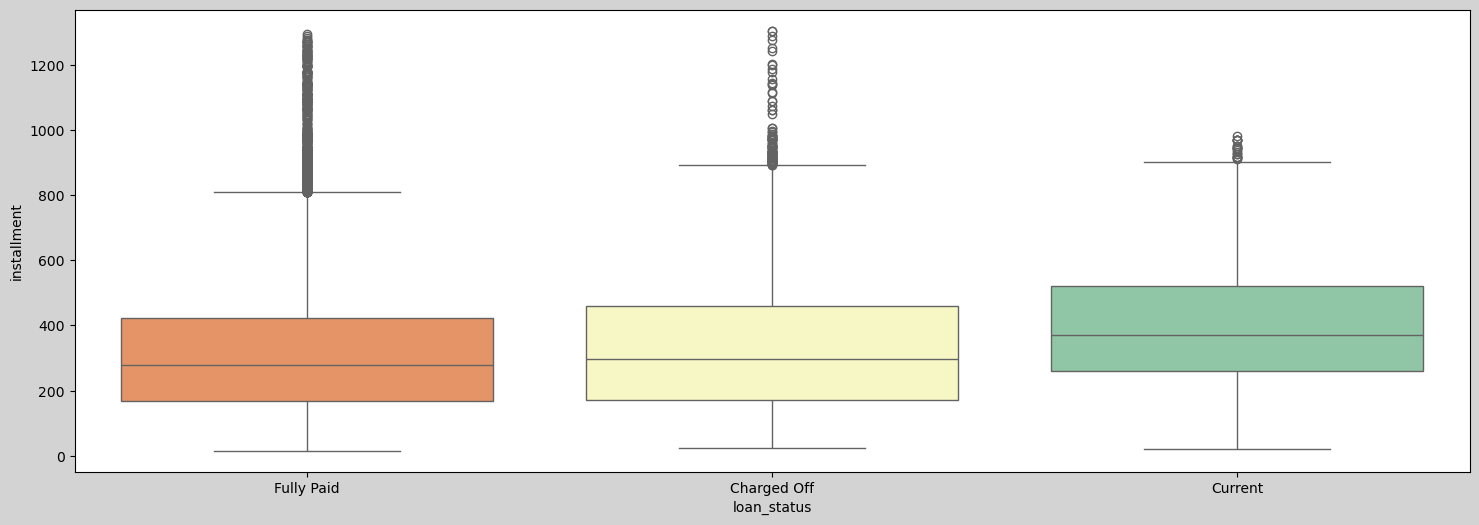

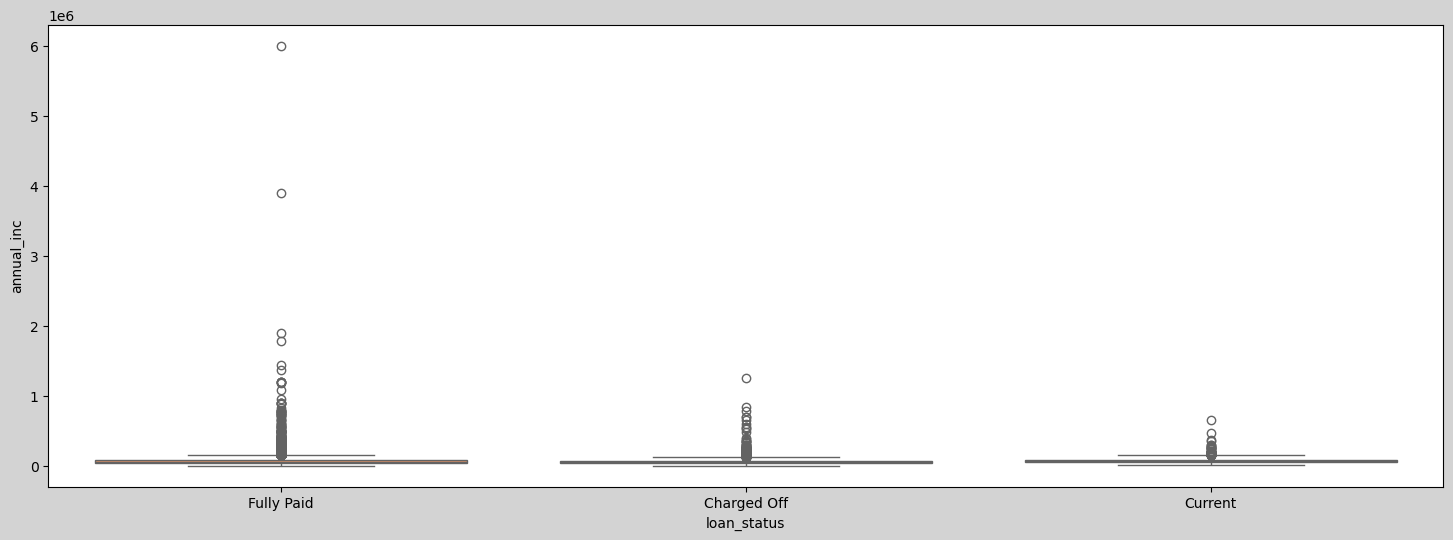

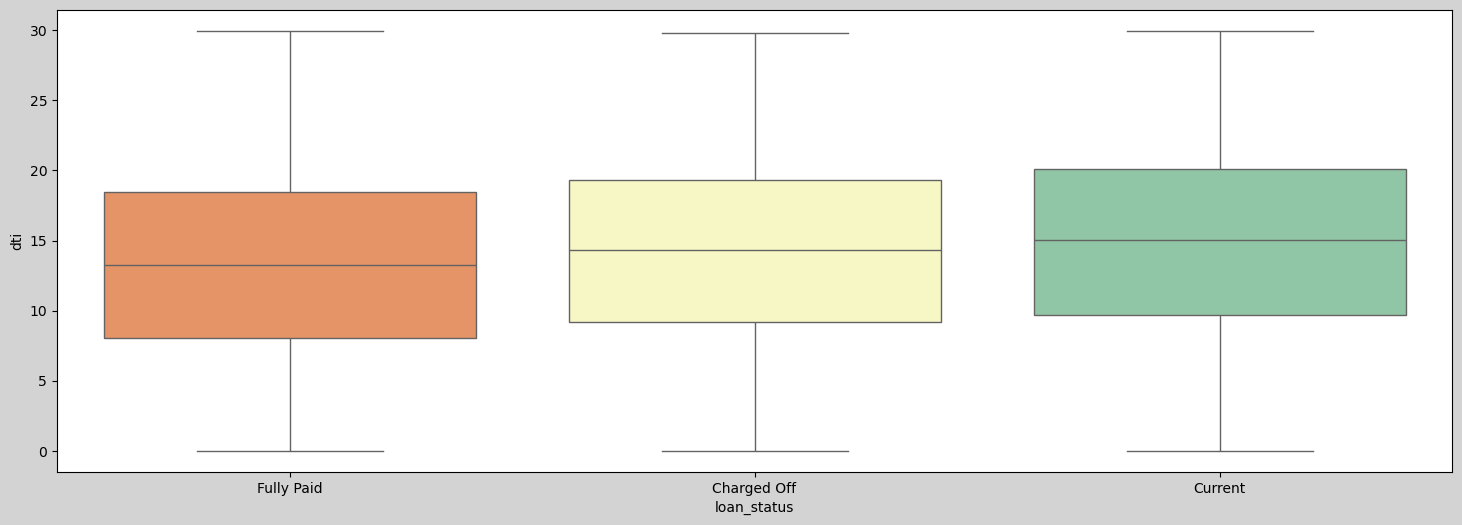

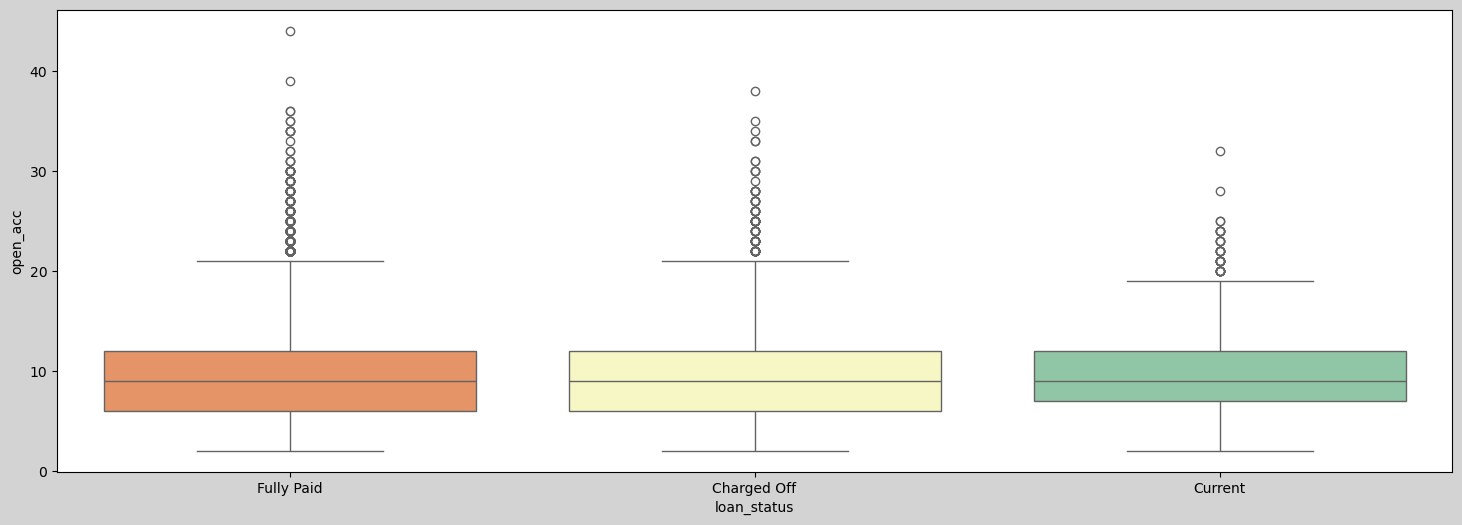

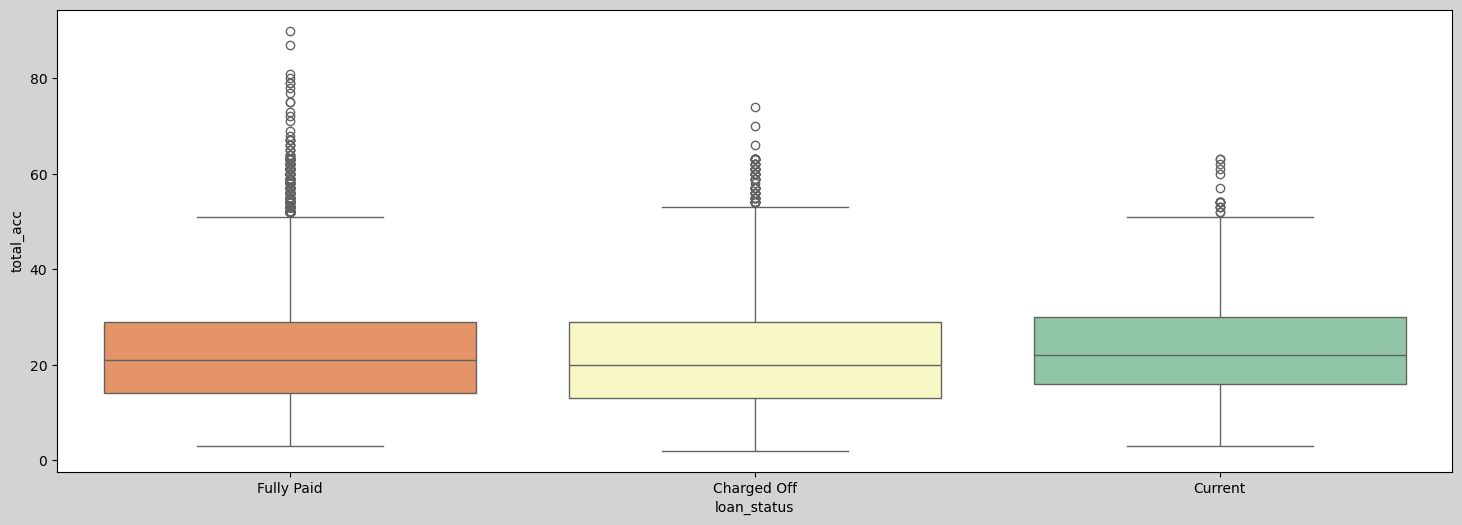

In [2012]:
for col in num_cols:
    plt.figure(figsize=(18, 6), facecolor='lightgray')
    sns.reset_defaults()
    sns.boxplot(x=df["loan_status"],y=df[col], palette='Spectral')
    plt.show()

#### Inferences from above graphs:
1. On higher interest rates the average defaulters are more. Also, the loans with status - 'current' are also of higher int rates so probability of defaults are high for the current running loans.
2. No other inferences from other columns

## MultiVariate Analysis

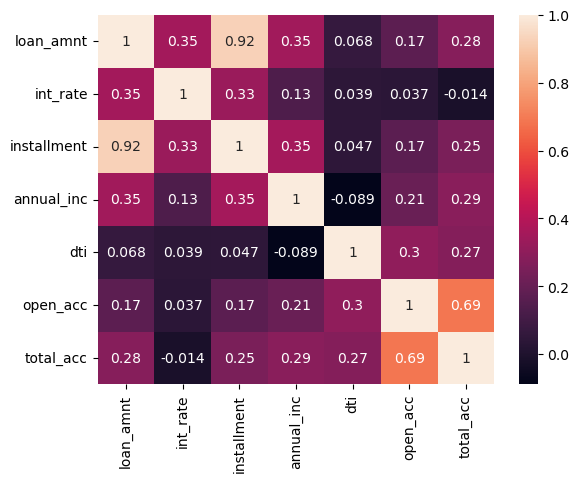

In [1981]:
df_defaulters = df[df["loan_status"]=='Charged Off']
sns.heatmap(df_defaulters[num_cols].corr(), annot=True)
plt.show()

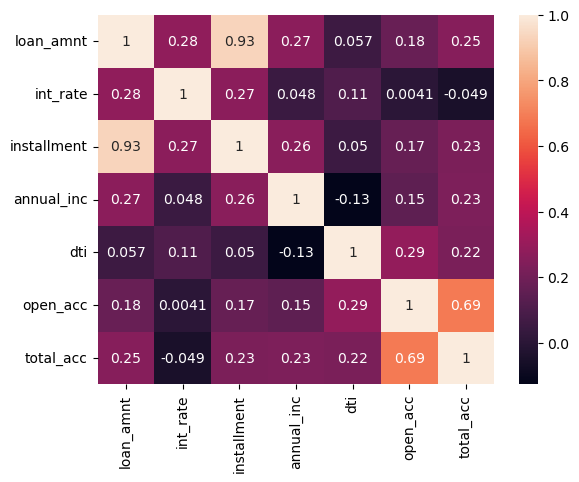

In [1983]:
df_full = df[df["loan_status"]=='Fully Paid']
sns.heatmap(df_full[num_cols].corr(), annot=True)
plt.show()

 #### No significant observations are derived from the heatmap

## inferences towards the loan to default:
1. Majority of loans are ’Not Verified’. Probability of verified loans to default are more than source verified. Not verified loans are also    close behind to default.
   It means LC is not verifying most of the loans and the ones that are verified are not done properly and there probability to default is      high.
2. On higher interest rates the average defaulters are more. Also, the loans with status - 'current' are also of higher int rates so         probability of current loans to default are high.
3. There is no other prominient variable for a loan to default apart from interest rate. The occurrences with highest 'Charged Off's  in any graph is majorly because of high amount of loan sanctioned for that value.